### Проект по эконометрике 2

Андреев Иван Васильевич, Андрюхин Борис Дмитриевич, Гусева Людмила.

Более подробные комментарии представлены в pdf-файле.

#### I. Сбор данных.

Данные представляют собой объявления о продаже жилой недвижимости в Москве, собранные с помощью парсинга cian.ru. Для этого мы использовали библиотеку python "cianparser". Имеем 1399 объявлений на 19.04.2025.

In [2]:
import cianparser

moscow_parser = cianparser.CianParser(location="Москва")
data = moscow_parser.get_flats(deal_type="sale", rooms="all", with_saving_csv=True, with_extra_data=True, additional_settings={"start_page":1, "end_page":57})
data

/Users/ivanandreev/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



                              Preparing to collect information from pages..
The absolute path to the file: 
/Users/ivanandreev/Desktop/metrics/cian_flat_sale_1_57_moskva_19_Apr_2025_13_59_22_202458.csv 

The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 2 %. Average price: 1 356 730 690 rub
 2 | 2 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 54. Progress ratio: 4 %. Average price: 1 414 591 290 rub
 3 | 3 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 74. Progress ratio: 5 %. Average price: 1 476 541 827 rub
 4 | 4 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 100. Progress rati

[{'author': 'VESPER',
  'author_type': 'developer',
  'url': 'https://www.cian.ru/sale/flat/308803465/',
  'location': 'Москва',
  'deal_type': 'sale',
  'accommodation_type': 'flat',
  'floor': 1,
  'floors_count': 6,
  'rooms_count': 2,
  'total_meters': 173.3,
  'price': 467910000,
  'year_of_construction': '2027',
  'object_type': -1,
  'house_material_type': 'Кирпичный',
  'heating_type': -1,
  'finish_type': 'Чистовая, чистовая с мебелью',
  'living_meters': -1,
  'kitchen_meters': -1,
  'phone': '+74951476131',
  'district': 'Пресненский',
  'street': 'Патриаршие Пруды мкр',
  'house_number': '',
  'underground': 'Пушкинская',
  'residential_complex': 'Клубный дом Левенсон'},
 {'author': 'Аврора Проперти',
  'author_type': 'real_estate_agent',
  'url': 'https://www.cian.ru/sale/flat/308799411/',
  'location': 'Москва',
  'deal_type': 'sale',
  'accommodation_type': 'flat',
  'floor': 2,
  'floors_count': 5,
  'rooms_count': 3,
  'total_meters': 146.8,
  'price': 400000000,
  'ye

In [40]:
import pandas as pd
import numpy as np

data = pd.read_csv("cian_flat_sale_1_57_moskva_19_Apr_2025_13_59_22_202458.csv", sep=';')
data

author        author_type  \
0                VESPER          developer   
1       Аврора Проперти  real_estate_agent   
2        Мария Науменко            realtor   
3                VESPER          developer   
4              NF GROUP  real_estate_agent   
...                 ...                ...   
1394      Kalinka Group  real_estate_agent   
1395      Kalinka Group  real_estate_agent   
1396  Apple Real Estate  real_estate_agent   
1397        ID 79626751          homeowner   
1398        ID 72053763            unknown   

                                           url location deal_type  \
0     https://www.cian.ru/sale/flat/308803465/   Москва      sale   
1     https://www.cian.ru/sale/flat/308799411/   Москва      sale   
2     https://www.cian.ru/sale/flat/315881967/   Москва      sale   
3     https://www.cian.ru/sale/flat/286258299/   Москва      sale   
4     https://www.cian.ru/sale/flat/306350609/   Москва      sale   
...                                        ...      ...       ...   
1394  https://www.cian.ru/sale/flat/315110405/   Москва      sale   
1395  https://www.cian.ru/sale/flat/315973059/   Москва      sale   
1396  https://www.cian.ru/sale/flat/312685129/   Москва      sale   
1397  https://www.cian.ru/sale/flat/315701167/   Москва      sale   
1398  https://www.cian.ru/sale/flat/315687905/   Москва      sale   

     accommodation_type  floor  floors_count  rooms_count  total_meters  ...  \
0                  flat      1             6            2         173.3  ...   
1                  flat      2             5            3         146.8  ...   
2                  flat      9             9            2          44.0  ...   
3                  flat      5             9            2         104.2  ...   
4                  flat      2             8           -1         235.8  ...   
...                 ...    ...           ...          ...           ...  ...   
1394               flat      8            15           -1         408.0  ...   
1395               flat     11            13            3         149.2  ...   
1396               flat      5             5           -1         200.0  ...   
1397               flat      6             8            5         200.0  ...   
1398               flat     14            16            2          63.0  ...   

      heating_type                   finish_type  living_meters  \
0               -1  Чистовая, чистовая с мебелью             -1   
1               -1                            -1             -1   
2               -1                            -1          35 м²   
3               -1            Чистовая с мебелью             -1   
4               -1                            -1             -1   
...            ...                           ...            ...   
1394            -1                            -1             -1   
1395            -1                            -1             -1   
1396            -1                            -1         134 м²   
1397            -1                            -1             -1   
1398            -1                            -1          31 м²   

     kitchen_meters        phone            district  \
0                -1  74951476131         Пресненский   
1             15 м²  79652530061           Хамовники   
2              6 м²  79151108860        Левобережный   
3             28 м²  74951474575            Тверской   
4             20 м²  79680684965           Хамовники   
...             ...          ...                 ...   
1394             -1  79850019296         Обручевский   
1395          20 м²  79154194704           Хамовники   
1396          40 м²  79651060608           Таганский   
1397        53,3 м²  79152431935           Хамовники   
1398          10 м²  79855429595  Тропарево-Никулино   

                        street house_number      underground  \
0         Патриаршие Пруды мкр          NaN       Пушкинская   
1     Пречистенская набережная           43    Кропоткинская   
2   

Для проверки одной из гипотез нам понадобятся географические координаты станций метро. Они собраны с помощью обращения по API к hh.ru (перейти по [ссылке](https://api.hh.ru/metro/1))

In [41]:
import json

with open('metro.json', encoding='utf-8') as f:
    metro_json = json.load(f)

stations_data = []

for line in metro_json['lines']:
    for station in line['stations']:
        stations_data.append({
            'underground': station['name'],
            'metro_lon': station['lng'],
            'metro_lat': station['lat']
        })

metro = pd.DataFrame(stations_data)
metro = metro.drop_duplicates(subset='underground', keep='first')
metro['underground'] = metro['underground'].str.replace('ё', 'е').str.replace('Ё', 'Е')
metro['underground'] = metro['underground'].str.lower().str.strip()

In [42]:
data['underground'] = data['underground'].str.replace('ё', 'е').str.replace('Ё', 'Е')
data['underground'] = data['underground'].str.lower().str.strip()
data = pd.merge(data, metro, on='underground', how='left')
data

author        author_type  \
0                VESPER          developer   
1       Аврора Проперти  real_estate_agent   
2        Мария Науменко            realtor   
3                VESPER          developer   
4              NF GROUP  real_estate_agent   
...                 ...                ...   
1394      Kalinka Group  real_estate_agent   
1395      Kalinka Group  real_estate_agent   
1396  Apple Real Estate  real_estate_agent   
1397        ID 79626751          homeowner   
1398        ID 72053763            unknown   

                                           url location deal_type  \
0     https://www.cian.ru/sale/flat/308803465/   Москва      sale   
1     https://www.cian.ru/sale/flat/308799411/   Москва      sale   
2     https://www.cian.ru/sale/flat/315881967/   Москва      sale   
3     https://www.cian.ru/sale/flat/286258299/   Москва      sale   
4     https://www.cian.ru/sale/flat/306350609/   Москва      sale   
...                                        ...      ...       ...   
1394  https://www.cian.ru/sale/flat/315110405/   Москва      sale   
1395  https://www.cian.ru/sale/flat/315973059/   Москва      sale   
1396  https://www.cian.ru/sale/flat/312685129/   Москва      sale   
1397  https://www.cian.ru/sale/flat/315701167/   Москва      sale   
1398  https://www.cian.ru/sale/flat/315687905/   Москва      sale   

     accommodation_type  floor  floors_count  rooms_count  total_meters  ...  \
0                  flat      1             6            2         173.3  ...   
1                  flat      2             5            3         146.8  ...   
2                  flat      9             9            2          44.0  ...   
3                  flat      5             9            2         104.2  ...   
4                  flat      2             8           -1         235.8  ...   
...                 ...    ...           ...          ...           ...  ...   
1394               flat      8            15           -1         408.0  ...   
1395               flat     11            13            3         149.2  ...   
1396               flat      5             5           -1         200.0  ...   
1397               flat      6             8            5         200.0  ...   
1398               flat     14            16            2          63.0  ...   

      living_meters kitchen_meters        phone            district  \
0                -1             -1  74951476131         Пресненский   
1                -1          15 м²  79652530061           Хамовники   
2             35 м²           6 м²  79151108860        Левобережный   
3                -1          28 м²  74951474575            Тверской   
4                -1          20 м²  79680684965           Хамовники   
...             ...            ...          ...                 ...   
1394             -1             -1  79850019296         Обручевский   
1395             -1          20 м²  79154194704           Хамовники   
1396         134 м²          40 м²  79651060608           Таганский   
1397             -1        53,3 м²  79152431935           Хамовники   
1398          31 м²          10 м²  79855429595  Тропарево-Никулино   

                        street house_number      underground  \
0         Патриаршие Пруды мкр          NaN       пушкинская   
1     Пречистенская набережная           43    кропоткинская   
2                Фестивальная            11    речной вокзал   
3         1-я Тверская-Ямская            2А       маяковская   
4                Льва Толстого         23к1    парк культуры   
...                        ...          ...              ...   
1394       Архитектора Власова           22  новые черемушки   
1395                   Усачева          11Б       спортивная   
1396   Подколокольный переулок          6С3      китай-город   
1397                   Усачева          15А       спортивная   
1398   26 Бакинских Комиссаров          8к6     юго-западная   

       residential_complex  metro_lon  metro_lat  
0

Также нам понадобятся координаты квартир. Попробуем их вычленить с помощью библиотеки "geopy".

In [4]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

streets = list(data.street.unique())

cleaned_streets = [street.strip() for street in streets if pd.notna(street)]
df = pd.DataFrame({'street': cleaned_streets})
geolocator = Nominatim(user_agent="street-geocoder", timeout=10)
geocode = RateLimiter(lambda query: geolocator.geocode(f"{query}, Москва, Россия"), min_delay_seconds=1)

df['location'] = df['street'].apply(geocode)
df['street_lat'] = df['location'].apply(lambda loc: loc.latitude if loc else None)
df['street_lon'] = df['location'].apply(lambda loc: loc.longitude if loc else None)
df.drop(columns=['location'], inplace=True)
df

street  street_lat  street_lon
0        Патриаршие Пруды мкр         NaN         NaN
1    Пречистенская набережная   55.747630   37.612164
2                Фестивальная   55.743783   37.864833
3         1-я Тверская-Ямская   55.774359   37.588850
4               Льва Толстого   55.734952   37.585368
..                        ...         ...         ...
454               Дунаевского   55.743014   37.545308
455           Трубная площадь   55.767149   37.621817
456      Сельскохозяйственная   55.841495   37.628564
457   Подколокольный переулок   55.752957   37.640811
458   26 Бакинских Комиссаров   55.662345   37.484800

[459 rows x 3 columns]

In [43]:
data['street'] = data['street'].str.strip()
main = pd.merge(data, df, on='street', how='left')
main

author        author_type  \
0                VESPER          developer   
1       Аврора Проперти  real_estate_agent   
2        Мария Науменко            realtor   
3                VESPER          developer   
4              NF GROUP  real_estate_agent   
...                 ...                ...   
1394      Kalinka Group  real_estate_agent   
1395      Kalinka Group  real_estate_agent   
1396  Apple Real Estate  real_estate_agent   
1397        ID 79626751          homeowner   
1398        ID 72053763            unknown   

                                           url location deal_type  \
0     https://www.cian.ru/sale/flat/308803465/   Москва      sale   
1     https://www.cian.ru/sale/flat/308799411/   Москва      sale   
2     https://www.cian.ru/sale/flat/315881967/   Москва      sale   
3     https://www.cian.ru/sale/flat/286258299/   Москва      sale   
4     https://www.cian.ru/sale/flat/306350609/   Москва      sale   
...                                        ...      ...       ...   
1394  https://www.cian.ru/sale/flat/315110405/   Москва      sale   
1395  https://www.cian.ru/sale/flat/315973059/   Москва      sale   
1396  https://www.cian.ru/sale/flat/312685129/   Москва      sale   
1397  https://www.cian.ru/sale/flat/315701167/   Москва      sale   
1398  https://www.cian.ru/sale/flat/315687905/   Москва      sale   

     accommodation_type  floor  floors_count  rooms_count  total_meters  ...  \
0                  flat      1             6            2         173.3  ...   
1                  flat      2             5            3         146.8  ...   
2                  flat      9             9            2          44.0  ...   
3                  flat      5             9            2         104.2  ...   
4                  flat      2             8           -1         235.8  ...   
...                 ...    ...           ...          ...           ...  ...   
1394               flat      8            15           -1         408.0  ...   
1395               flat     11            13            3         149.2  ...   
1396               flat      5             5           -1         200.0  ...   
1397               flat      6             8            5         200.0  ...   
1398               flat     14            16            2          63.0  ...   

            phone            district                    street house_number  \
0     74951476131         Пресненский      Патриаршие Пруды мкр          NaN   
1     79652530061           Хамовники  Пречистенская набережная           43   
2     79151108860        Левобережный              Фестивальная           11   
3     74951474575            Тверской       1-я Тверская-Ямская           2А   
4     79680684965           Хамовники             Льва Толстого         23к1   
...           ...                 ...                       ...          ...   
1394  79850019296         Обручевский       Архитектора Власова           22   
1395  79154194704           Хамовники                   Усачева          11Б   
1396  79651060608           Таганский   Подколокольный переулок          6С3   
1397  79152431935           Хамовники                   Усачева          15А   
1398  79855429595  Тропарево-Никулино   26 Бакинских Комиссаров          8к6   

          underground   residential_complex  metro_lon  metro_lat  street_lat  \
0          пушкинская  Клубный дом Левенсон  37.604356  55.765607         NaN   
1       кропоткинская           Carré Blanc  37.604217  55.745297   55.747630   
2       речной вокзал                   NaN  37.476728  55.854152   55.743783   
3          маяковская      Vesper Tverskaya  37.596192  55.769808   55.774359   
4       парк культуры             Литератор  37.595027  55.736163   55.734952   
...               ...                   ...        ...        ...         ...   
1394  новые черемушки                   NaN  37.554493  55.670077   55.671043   
1395       спортивная      Садовые кварталы  37.562041  55.722388

In [44]:
from geopy.distance import geodesic

def compute_distance(row):
    if pd.isna(row['metro_lat']) or pd.isna(row['metro_lon']) or pd.isna(row['street_lat']) or pd.isna(row['street_lon']):
        return None

    metro_coords = (row['metro_lat'], row['metro_lon'])
    street_coords = (row['street_lat'], row['street_lon'])

    return geodesic(metro_coords, street_coords).meters

main['metro_distance'] = main.apply(compute_distance, axis=1)
main

author        author_type  \
0                VESPER          developer   
1       Аврора Проперти  real_estate_agent   
2        Мария Науменко            realtor   
3                VESPER          developer   
4              NF GROUP  real_estate_agent   
...                 ...                ...   
1394      Kalinka Group  real_estate_agent   
1395      Kalinka Group  real_estate_agent   
1396  Apple Real Estate  real_estate_agent   
1397        ID 79626751          homeowner   
1398        ID 72053763            unknown   

                                           url location deal_type  \
0     https://www.cian.ru/sale/flat/308803465/   Москва      sale   
1     https://www.cian.ru/sale/flat/308799411/   Москва      sale   
2     https://www.cian.ru/sale/flat/315881967/   Москва      sale   
3     https://www.cian.ru/sale/flat/286258299/   Москва      sale   
4     https://www.cian.ru/sale/flat/306350609/   Москва      sale   
...                                        ...      ...       ...   
1394  https://www.cian.ru/sale/flat/315110405/   Москва      sale   
1395  https://www.cian.ru/sale/flat/315973059/   Москва      sale   
1396  https://www.cian.ru/sale/flat/312685129/   Москва      sale   
1397  https://www.cian.ru/sale/flat/315701167/   Москва      sale   
1398  https://www.cian.ru/sale/flat/315687905/   Москва      sale   

     accommodation_type  floor  floors_count  rooms_count  total_meters  ...  \
0                  flat      1             6            2         173.3  ...   
1                  flat      2             5            3         146.8  ...   
2                  flat      9             9            2          44.0  ...   
3                  flat      5             9            2         104.2  ...   
4                  flat      2             8           -1         235.8  ...   
...                 ...    ...           ...          ...           ...  ...   
1394               flat      8            15           -1         408.0  ...   
1395               flat     11            13            3         149.2  ...   
1396               flat      5             5           -1         200.0  ...   
1397               flat      6             8            5         200.0  ...   
1398               flat     14            16            2          63.0  ...   

                district                    street  house_number  \
0            Пресненский      Патриаршие Пруды мкр           NaN   
1              Хамовники  Пречистенская набережная            43   
2           Левобережный              Фестивальная            11   
3               Тверской       1-я Тверская-Ямская            2А   
4              Хамовники             Льва Толстого          23к1   
...                  ...                       ...           ...   
1394         Обручевский       Архитектора Власова            22   
1395           Хамовники                   Усачева           11Б   
1396           Таганский   Подколокольный переулок           6С3   
1397           Хамовники                   Усачева           15А   
1398  Тропарево-Никулино   26 Бакинских Комиссаров           8к6   

          underground   residential_complex  metro_lon  metro_lat street_lat  \
0          пушкинская  Клубный дом Левенсон  37.604356  55.765607        NaN   
1       кропоткинская           Carré Blanc  37.604217  55.745297  55.747630   
2       речной вокзал                   NaN  37.476728  55.854152  55.743783   
3          маяковская      Vesper Tverskaya  37.596192  55.769808  55.774359   
4       парк культуры             Литератор  37.595027  55.736163  55.734952   
...               ...                   ...        ...        ...        ...   
1394  новые черемушки                   NaN  37.554493  55.670077  55.671043   
1395       спортивная      Садовые кварталы  37.562041  55.722388  55.724363   
1396      китай-город                   NaN  37.631326  55.756498  55.752957   
1397       спортивная      Садовые кварталы  37.562041  5

Оставим только нужные регрессоры.

In [45]:
main = main[['author_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'district', 'underground', 'residential_complex', 'metro_lon', 'metro_lat',
       'street_lat', 'street_lon', 'metro_distance']]
main

author_type  floor  floors_count  rooms_count  total_meters  \
0             developer      1             6            2         173.3   
1     real_estate_agent      2             5            3         146.8   
2               realtor      9             9            2          44.0   
3             developer      5             9            2         104.2   
4     real_estate_agent      2             8           -1         235.8   
...                 ...    ...           ...          ...           ...   
1394  real_estate_agent      8            15           -1         408.0   
1395  real_estate_agent     11            13            3         149.2   
1396  real_estate_agent      5             5           -1         200.0   
1397          homeowner      6             8            5         200.0   
1398            unknown     14            16            2          63.0   

            price year_of_construction            district      underground  \
0     467910000.0                 2027         Пресненский       пушкинская   
1     400000000.0                 2021           Хамовники    кропоткинская   
2      17500000.0                 1965        Левобережный    речной вокзал   
3     174388599.0                 2023            Тверской       маяковская   
4     495000000.0                 2014           Хамовники    парк культуры   
...           ...                  ...                 ...              ...   
1394  200000000.0                 2000         Обручевский  новые черемушки   
1395  280000000.0                   -1           Хамовники       спортивная   
1396  125000000.0                   -1           Таганский      китай-город   
1397  750000000.0                   -1           Хамовники       спортивная   
1398   29400000.0                   -1  Тропарево-Никулино     юго-западная   

       residential_complex  metro_lon  metro_lat  street_lat  street_lon  \
0     Клубный дом Левенсон  37.604356  55.765607         NaN         NaN   
1              Carré Blanc  37.604217  55.745297   55.747630   37.612164   
2                      NaN  37.476728  55.854152   55.743783   37.864833   
3         Vesper Tverskaya  37.596192  55.769808   55.774359   37.588850   
4                Литератор  37.595027  55.736163   55.734952   37.585368   
...                    ...        ...        ...         ...         ...   
1394                   NaN  37.554493  55.670077   55.671043   37.543888   
1395      Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1396                   NaN  37.631326  55.756498   55.752957   37.640811   
1397      Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1398                   NaN  37.482852  55.663146   55.662345   37.484800   

      metro_distance  
0                NaN  
1         562.594042  
2       27266.430605  
3         684.859845  
4         621.572553  
...              ...  
1394      675.919505  
1395      230.672772  
1396      714.253967  
1397      230.672772  
1398      151.624602  

[1399 rows x 15 columns]

In [46]:
district_to_ao = {
    'Арбат': 'ЦАО',
    'Басманный': 'ЦАО',
    'Замоскворечье': 'ЦАО',
    'Красносельский': 'ЦАО',
    'Мещанский': 'ЦАО',
    'Пресненский': 'ЦАО',
    'Таганский': 'ЦАО',
    'Тверской': 'ЦАО',
    'Хамовники': 'ЦАО',
    'Якиманка': 'ЦАО',

    'Аэропорт': 'САО',
    'Беговой': 'САО',
    'Бескудниковский': 'САО',
    'Войковский': 'САО',
    'Восточное Дегунино': 'САО',
    'Головинский': 'САО',
    'Дмитровский': 'САО',
    'Западное Дегунино': 'САО',
    'Коптево': 'САО',
    'Левобережный': 'САО',
    'Молжаниновский': 'САО',
    'Савеловский': 'САО',
    'Сокол': 'САО',
    'Тимирязевский': 'САО',
    'Ховрино': 'САО',
    'Хорошевский': 'САО',

    'Алексеевский': 'СВАО',
    'Алтуфьевский': 'СВАО',
    'Бабушкинский': 'СВАО',
    'Бибирево': 'СВАО',
    'Бутырский': 'СВАО',
    'Лианозово': 'СВАО',
    'Лосиноостровский': 'СВАО',
    'Марфино': 'СВАО',
    'Марьина роща': 'СВАО',
    'Останкинский': 'СВАО',
    'Отрадное': 'СВАО',
    'Ростокино': 'СВАО',
    'Свиблово': 'СВАО',
    'Северный': 'СВАО',
    'Северное Медведково': 'СВАО',
    'Южное Медведково': 'СВАО',
    'Ярославский': 'СВАО',

    'Богородское': 'ВАО',
    'Вешняки': 'ВАО',
    'Восточный': 'ВАО',
    'Восточное Измайлово': 'ВАО',
    'Гольяново': 'ВАО',
    'Ивановское': 'ВАО',
    'Измайлово': 'ВАО',
    'Косино-Ухтомский': 'ВАО',
    'Метрогородок': 'ВАО',
    'Новогиреево': 'ВАО',
    'Новокосино': 'ВАО',
    'Перово': 'ВАО',
    'Преображенское': 'ВАО',
    'Северное Измайлово': 'ВАО',
    'Соколиная гора': 'ВАО',
    'Сокольники': 'ВАО',

    'Выхино-Жулебино': 'ЮВАО',
    'Капотня': 'ЮВАО',
    'Кузьминки': 'ЮВАО',
    'Лефортово': 'ЮВАО',
    'Люблино': 'ЮВАО',
    'Марьино': 'ЮВАО',
    'Некрасовка': 'ЮВАО',
    'Нижегородский': 'ЮВАО',
    'Печатники': 'ЮВАО',
    'Рязанский': 'ЮВАО',
    'Текстильщики': 'ЮВАО',
    'Южнопортовый': 'ЮВАО',

    'Бирюлево Восточное': 'ЮАО',
    'Бирюлево Западное': 'ЮАО',
    'Братеево': 'ЮАО',
    'Даниловский': 'ЮАО',
    'Донской': 'ЮАО',
    'Зябликово': 'ЮАО',
    'Москворечье-Сабурово': 'ЮАО',
    'Нагатино-Садовники': 'ЮАО',
    'Нагатинский затон': 'ЮАО',
    'Нагорный': 'ЮАО',
    'Орехово-Борисово Северное': 'ЮАО',
    'Орехово-Борисово Южное': 'ЮАО',
    'Царицыно': 'ЮАО',
    'Чертаново Северное': 'ЮАО',
    'Чертаново Центральное': 'ЮАО',
    'Чертаново Южное': 'ЮАО',

    'Академический': 'ЮЗАО',
    'Гагаринский': 'ЮЗАО',
    'Зюзино': 'ЮЗАО',
    'Коньково': 'ЮЗАО',
    'Котловка': 'ЮЗАО',
    'Ломоносовский': 'ЮЗАО',
    'Обручевский': 'ЮЗАО',
    'Северное Бутово': 'ЮЗАО',
    'Теплый Стан': 'ЮЗАО',
    'Черемушки': 'ЮЗАО',
    'Южное Бутово': 'ЮЗАО',
    'Ясенево': 'ЮЗАО',

    'Дорогомилово': 'ЗАО',
    'Крылатское': 'ЗАО',
    'Кунцево': 'ЗАО',
    'Можайский': 'ЗАО',
    'Ново-Переделкино': 'ЗАО',
    'Очаково-Матвеевское': 'ЗАО',
    'Проспект Вернадского': 'ЗАО',
    'Раменки': 'ЗАО',
    'Солнцево': 'ЗАО',
    'Тропарево-Никулино': 'ЗАО',
    'Филевский парк': 'ЗАО',
    'Фили-Давыдково': 'ЗАО',

    'Куркино': 'СЗАО',
    'Митино': 'СЗАО',
    'Покровское-Стрешнево': 'СЗАО',
    'Северное Тушино': 'СЗАО',
    'Строгино': 'СЗАО',
    'Хорошево-Мневники': 'СЗАО',
    'Щукино': 'СЗАО',
    'Южное Тушино': 'СЗАО',

    'Крюково': 'ЗелАО',
    'Матушкино': 'ЗелАО',
    'Савелки': 'ЗелАО',
    'Старое Крюково': 'ЗелАО',
    'Силино': 'ЗелАО',

    'Внуково': 'НАО',
    'Коммунарка': 'НАО',
    'Филимонковский': 'НАО',
    'Щербинка': 'НАО',

    'Бекасово': 'ТАО',
    'Вороново': 'ТАО',
    'Краснопахорский': 'ТАО',
    'Троицк': 'ТАО'
}

main['ao'] = main['district'].str.strip().str.replace('ё', 'е').str.replace('Ё', 'Е').map(district_to_ao).fillna('Неизвестно')
main

author_type  floor  floors_count  rooms_count  total_meters  \
0             developer      1             6            2         173.3   
1     real_estate_agent      2             5            3         146.8   
2               realtor      9             9            2          44.0   
3             developer      5             9            2         104.2   
4     real_estate_agent      2             8           -1         235.8   
...                 ...    ...           ...          ...           ...   
1394  real_estate_agent      8            15           -1         408.0   
1395  real_estate_agent     11            13            3         149.2   
1396  real_estate_agent      5             5           -1         200.0   
1397          homeowner      6             8            5         200.0   
1398            unknown     14            16            2          63.0   

            price year_of_construction            district      underground  \
0     467910000.0                 2027         Пресненский       пушкинская   
1     400000000.0                 2021           Хамовники    кропоткинская   
2      17500000.0                 1965        Левобережный    речной вокзал   
3     174388599.0                 2023            Тверской       маяковская   
4     495000000.0                 2014           Хамовники    парк культуры   
...           ...                  ...                 ...              ...   
1394  200000000.0                 2000         Обручевский  новые черемушки   
1395  280000000.0                   -1           Хамовники       спортивная   
1396  125000000.0                   -1           Таганский      китай-город   
1397  750000000.0                   -1           Хамовники       спортивная   
1398   29400000.0                   -1  Тропарево-Никулино     юго-западная   

       residential_complex  metro_lon  metro_lat  street_lat  street_lon  \
0     Клубный дом Левенсон  37.604356  55.765607         NaN         NaN   
1              Carré Blanc  37.604217  55.745297   55.747630   37.612164   
2                      NaN  37.476728  55.854152   55.743783   37.864833   
3         Vesper Tverskaya  37.596192  55.769808   55.774359   37.588850   
4                Литератор  37.595027  55.736163   55.734952   37.585368   
...                    ...        ...        ...         ...         ...   
1394                   NaN  37.554493  55.670077   55.671043   37.543888   
1395      Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1396                   NaN  37.631326  55.756498   55.752957   37.640811   
1397      Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1398                   NaN  37.482852  55.663146   55.662345   37.484800   

      metro_distance    ao  
0                NaN   ЦАО  
1         562.594042   ЦАО  
2       27266.430605   САО  
3         684.859845   ЦАО  
4         621.572553   ЦАО  
...              ...   ...  
1394      675.919505  ЮЗАО  
1395      230.672772   ЦАО  
1396      714.253967   ЦАО  
1397      230.672772   ЦАО  
1398      151.624602   ЗАО  

[1399 rows x 16 columns]

### II. Предварительный анализ.

Важнейшим этапом в анализе данных является обработка этих самых данных. Посмотрим на типы переменных, пропуски, распределения, зависимости и попробуем преобразовать наши данные, чтобы получить максимально возможную точность модели.

In [9]:
# Импорт библиотек и настройка параметров
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import folium
from typing import Iterable
from sklearn.base import BaseEstimator, TransformerMixin
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
sns.set(style='darkgrid', palette='deep')
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

In [48]:
# Типы переменных
main['year_of_construction'] = pd.to_numeric(main['year_of_construction'], errors='coerce')
main.dtypes

author_type              object
floor                     int64
floors_count              int64
rooms_count               int64
total_meters            float64
price                   float64
year_of_construction    float64
district                 object
underground              object
residential_complex      object
metro_lon               float64
metro_lat               float64
street_lat              float64
street_lon              float64
metro_distance          float64
ao                       object
dtype: object

#### 1. Пропуски.

Посмотрим на пропуски в датасете и решим, что с ними делать.

In [49]:
# Количество пропусков в каждом столбце
main.isna().sum()

author_type               0
floor                     0
floors_count              0
rooms_count               0
total_meters              0
price                    20
year_of_construction      3
district                 19
underground              10
residential_complex     333
metro_lon                42
metro_lat                42
street_lat              102
street_lon              102
metro_distance          138
ao                        0
dtype: int64

Ясно, что 20 наблюдений с пропущенной целевой переменной можно удалить из данных, так как они не принесут вклада в обучение модели, а потери невелики.

In [50]:
main = main[~main.price.isna()]
main

author_type  floor  floors_count  rooms_count  total_meters  \
0             developer      1             6            2         173.3   
1     real_estate_agent      2             5            3         146.8   
2               realtor      9             9            2          44.0   
3             developer      5             9            2         104.2   
4     real_estate_agent      2             8           -1         235.8   
...                 ...    ...           ...          ...           ...   
1394  real_estate_agent      8            15           -1         408.0   
1395  real_estate_agent     11            13            3         149.2   
1396  real_estate_agent      5             5           -1         200.0   
1397          homeowner      6             8            5         200.0   
1398            unknown     14            16            2          63.0   

            price  year_of_construction            district      underground  \
0     467910000.0                2027.0         Пресненский       пушкинская   
1     400000000.0                2021.0           Хамовники    кропоткинская   
2      17500000.0                1965.0        Левобережный    речной вокзал   
3     174388599.0                2023.0            Тверской       маяковская   
4     495000000.0                2014.0           Хамовники    парк культуры   
...           ...                   ...                 ...              ...   
1394  200000000.0                2000.0         Обручевский  новые черемушки   
1395  280000000.0                  -1.0           Хамовники       спортивная   
1396  125000000.0                  -1.0           Таганский      китай-город   
1397  750000000.0                  -1.0           Хамовники       спортивная   
1398   29400000.0                  -1.0  Тропарево-Никулино     юго-западная   

       residential_complex  metro_lon  metro_lat  street_lat  street_lon  \
0     Клубный дом Левенсон  37.604356  55.765607         NaN         NaN   
1              Carré Blanc  37.604217  55.745297   55.747630   37.612164   
2                      NaN  37.476728  55.854152   55.743783   37.864833   
3         Vesper Tverskaya  37.596192  55.769808   55.774359   37.588850   
4                Литератор  37.595027  55.736163   55.734952   37.585368   
...                    ...        ...        ...         ...         ...   
1394                   NaN  37.554493  55.670077   55.671043   37.543888   
1395      Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1396                   NaN  37.631326  55.756498   55.752957   37.640811   
1397      Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1398                   NaN  37.482852  55.663146   55.662345   37.484800   

      metro_distance    ao  
0                NaN   ЦАО  
1         562.594042   ЦАО  
2       27266.430605   САО  
3         684.859845   ЦАО  
4         621.572553   ЦАО  
...              ...   ...  
1394      675.919505  ЮЗАО  
1395      230.672772   ЦАО  
1396      714.253967   ЦАО  
1397      230.672772   ЦАО  
1398      151.624602   ЗАО  

[1379 rows x 16 columns]

Со столбцом residential_complex тоже все просто: пропуск - обычный дом, НЕ жилой комплекс. Присвоим пропускам отдельную категорию.

In [51]:
main['residential_complex'] = main['residential_complex'].fillna('no_complex')
main

author_type  floor  floors_count  rooms_count  total_meters  \
0             developer      1             6            2         173.3   
1     real_estate_agent      2             5            3         146.8   
2               realtor      9             9            2          44.0   
3             developer      5             9            2         104.2   
4     real_estate_agent      2             8           -1         235.8   
...                 ...    ...           ...          ...           ...   
1394  real_estate_agent      8            15           -1         408.0   
1395  real_estate_agent     11            13            3         149.2   
1396  real_estate_agent      5             5           -1         200.0   
1397          homeowner      6             8            5         200.0   
1398            unknown     14            16            2          63.0   

            price  year_of_construction            district      underground  \
0     467910000.0                2027.0         Пресненский       пушкинская   
1     400000000.0                2021.0           Хамовники    кропоткинская   
2      17500000.0                1965.0        Левобережный    речной вокзал   
3     174388599.0                2023.0            Тверской       маяковская   
4     495000000.0                2014.0           Хамовники    парк культуры   
...           ...                   ...                 ...              ...   
1394  200000000.0                2000.0         Обручевский  новые черемушки   
1395  280000000.0                  -1.0           Хамовники       спортивная   
1396  125000000.0                  -1.0           Таганский      китай-город   
1397  750000000.0                  -1.0           Хамовники       спортивная   
1398   29400000.0                  -1.0  Тропарево-Никулино     юго-западная   

       residential_complex  metro_lon  metro_lat  street_lat  street_lon  \
0     Клубный дом Левенсон  37.604356  55.765607         NaN         NaN   
1              Carré Blanc  37.604217  55.745297   55.747630   37.612164   
2               no_complex  37.476728  55.854152   55.743783   37.864833   
3         Vesper Tverskaya  37.596192  55.769808   55.774359   37.588850   
4                Литератор  37.595027  55.736163   55.734952   37.585368   
...                    ...        ...        ...         ...         ...   
1394            no_complex  37.554493  55.670077   55.671043   37.543888   
1395      Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1396            no_complex  37.631326  55.756498   55.752957   37.640811   
1397      Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1398            no_complex  37.482852  55.663146   55.662345   37.484800   

      metro_distance    ao  
0                NaN   ЦАО  
1         562.594042   ЦАО  
2       27266.430605   САО  
3         684.859845   ЦАО  
4         621.572553   ЦАО  
...              ...   ...  
1394      675.919505  ЮЗАО  
1395      230.672772   ЦАО  
1396      714.253967   ЦАО  
1397      230.672772   ЦАО  
1398      151.624602   ЗАО  

[1379 rows x 16 columns]

Посмотрим на данные с пропущенным районом.

In [52]:
main[main.district.isna()]

author_type  floor  floors_count  rooms_count  total_meters  \
61    real_estate_agent      4            15            2          59.7   
116           developer      2            17            3          65.6   
171           developer      2            20            2          53.6   
259           developer      2             7            2          77.6   
383   real_estate_agent     14            14            3          84.5   
727             realtor      1             5            3          58.7   
989           homeowner     14            19            1          28.6   
1047  real_estate_agent      4             8            1          22.5   
1048  real_estate_agent      9             9            1          24.6   
1049  real_estate_agent     12            18            1          23.0   
1050  real_estate_agent      7            16            2          39.3   
1136  real_estate_agent     12            13            2          55.0   
1146  real_estate_agent      6            12            1          40.0   
1259  real_estate_agent      2             9            1          42.0   
1262  real_estate_agent      9            16            2          35.2   
1264  real_estate_agent      3             8            1          42.0   
1270  real_estate_agent      2             3            3          71.0   
1276  real_estate_agent      3            19            3          63.0   
1336  real_estate_agent      5             5            3         343.6   

           price  year_of_construction district     underground  \
61    12500000.0                2023.0      NaN        ольховая   
116   15753010.0                2026.0      NaN    корниловская   
171   11652737.0                2027.0      NaN     филатов луг   
259   29744080.0                2026.0      NaN  серебряный бор   
383   16500000.0                2021.0      NaN        ольховая   
727    9750000.0                1972.0      NaN        потапово   
989   12250000.0                2022.0      NaN        прокшино   
1047   7500000.0                2025.0      NaN        потапово   
1048   8382618.0                2025.0      NaN        потапово   
1049   8600000.0                2025.0      NaN        потапово   
1050   9150000.0                2024.0      NaN        потапово   
1136  22000000.0                2023.0      NaN        ольховая   
1146   8490000.0                2019.0      NaN     филатов луг   
1259   9000000.0                2024.0      NaN        крекшино   
1262  12300000.0                  -1.0      NaN        потапово   
1264  12300000.0                  -1.0      NaN        ольховая   
1270  14000000.0                  -1.0      NaN       румянцево   
1276  16800000.0                2025.0      NaN        прокшино   
1336  70000000.0                2012.0      NaN             NaN   

                    residential_complex  metro_lon  metro_lat  street_lat  \
61          Новые Ватутинки, мкр. Десна  37.458900  55.569200   55.415182   
116                           FOREVILLE  37.479586  55.599411         NaN   
171        Город-парк Первый Московский  37.407500  55.599700         NaN   
259                         Сберсити ЖК        NaN        NaN         NaN   
383   Новые Ватутинки, мкр. Центральный  37.458900  55.569200   55.520769   
727                          no_complex  37.490978  55.552538         NaN   
989                            Прокшино  37.442500  55.581300   55.592209   
1047              Бунинские Кварталы ЖК  37.490978  55.552538         NaN   
1048                     Скандинавия ЖК  37.490978  55.552538         NaN   
1049                   Дзен-кварталы ЖК  37.490978  55.552538         NaN   
1050              Бунинские Кварталы ЖК  37.490978  55.552538         NaN   
1136            Russian Design District  37.458900  55.569200   55.502216   
1146                 Спортивный квартал  37.407500  55.599700   55.549387   
1259                          Эдельвейс  37.109722  55.577778         NaN   
1262           

Наблюдения, для которых отсутствуют и район, и координаты можно удалить. Для остальных попробуем найти ближайшего соседа по координатам и присвоить тот же район и округ.

In [53]:
known = main.dropna(subset=['district', 'street_lat', 'street_lon']).copy()
missing = main[main['district'].isna() & main['street_lat'].notna() & main['street_lon'].notna()].copy()

def find_nearest_district(row, known_df):
    target_coords = (row['street_lat'], row['street_lon'])
    distances = known_df.apply(lambda x: geodesic(target_coords, (x['street_lat'], x['street_lon'])).meters, axis=1)
    nearest_idx = distances.idxmin()
    return known_df.loc[nearest_idx, ['district', 'ao']]

for idx, row in missing.iterrows():
    district, ao = find_nearest_district(row, known)
    main.at[idx, 'district'] = district
    main.at[idx, 'ao'] = ao

In [54]:
main = main.dropna(subset=['district'])

Наблюдения, для которых пропущены координаты улиц, придется удалить. Присвоить координаты метро бесполезно - пропадет признак metro_distance. Координаты районов добавят только шум.

In [55]:
main = main.dropna(subset=['street_lat'])

Остаются координаты метро. Посмотрим, что это за станции.

In [56]:
main[main.metro_lon.isna()].underground.unique()

array(['зеленоград — крюково', 'карамышевская', 'остров мечты',
       'серебряный бор', nan, 'бульвар генерала карбышева', 'матвеевская',
       'вавиловская'], dtype=object)

Станций мало - добавим вручную

In [57]:
stations_coords = {
    'зеленоград — крюково': {'metro_lat': 55.980267, 'metro_lon': 37.173630},
    'карамышевская': {'metro_lat': 55.776097, 'metro_lon': 37.456801},
    'остров мечты': {'metro_lat': 55.6939, 'metro_lon': 37.6642},
    'серебряный бор': {'metro_lat': 55.784788, 'metro_lon':  37.420786},
    'бульвар генерала карбышева': {'metro_lat': 55.779089, 'metro_lon': 37.471569},
    'матвеевская': {'metro_lat': 55.7050, 'metro_lon': 37.4870},
    'вавиловская': {'metro_lat': 55.7050, 'metro_lon': 37.5870}
}

coords_df = pd.DataFrame.from_dict(stations_coords, orient='index').reset_index()
coords_df.columns = ['underground', 'metro_lat', 'metro_lon']

missing_coords = main[main['metro_lat'].isna()].copy()
missing_coords['original_index'] = missing_coords.index
filled = missing_coords.merge(coords_df, on='underground', how='left', suffixes=('', '_new'))
main.loc[filled['original_index'], 'metro_lat'] = filled['metro_lat_new']
main.loc[filled['original_index'], 'metro_lon'] = filled['metro_lon']

main['metro_distance'] = main.apply(compute_distance, axis=1)


Остальные пропуски удалим.

In [58]:
main = main.dropna()

Остался год постройки. Важный признак, влияние которого мы бы хотели исследовать. Придется заполнить средним значением.

In [59]:
main['year_of_construction'] = pd.to_numeric(
    main['year_of_construction'],
    errors='coerce'
)
valid = main['year_of_construction'] != -1
median_year = main.loc[valid, 'year_of_construction'].median()
main.loc[main['year_of_construction'] == -1, 'year_of_construction'] = median_year
main

author_type  floor  floors_count  rooms_count  total_meters  \
1     real_estate_agent      2             5            3         146.8   
2               realtor      9             9            2          44.0   
3             developer      5             9            2         104.2   
4     real_estate_agent      2             8           -1         235.8   
5     real_estate_agent      8             8            3         213.4   
...                 ...    ...           ...          ...           ...   
1394  real_estate_agent      8            15           -1         408.0   
1395  real_estate_agent     11            13            3         149.2   
1396  real_estate_agent      5             5           -1         200.0   
1397          homeowner      6             8            5         200.0   
1398            unknown     14            16            2          63.0   

            price  year_of_construction            district      underground  \
1     400000000.0                2021.0           Хамовники    кропоткинская   
2      17500000.0                1965.0        Левобережный    речной вокзал   
3     174388599.0                2023.0            Тверской       маяковская   
4     495000000.0                2014.0           Хамовники    парк культуры   
5     234740000.0                2022.0           Таганский      китай-город   
...           ...                   ...                 ...              ...   
1394  200000000.0                2000.0         Обручевский  новые черемушки   
1395  280000000.0                2019.0           Хамовники       спортивная   
1396  125000000.0                2019.0           Таганский      китай-город   
1397  750000000.0                2019.0           Хамовники       спортивная   
1398   29400000.0                2019.0  Тропарево-Никулино     юго-западная   

     residential_complex  metro_lon  metro_lat  street_lat  street_lon  \
1            Carré Blanc  37.604217  55.745297   55.747630   37.612164   
2             no_complex  37.476728  55.854152   55.743783   37.864833   
3       Vesper Tverskaya  37.596192  55.769808   55.774359   37.588850   
4              Литератор  37.595027  55.736163   55.734952   37.585368   
5                  LUMIN  37.631326  55.756498   55.754245   37.634118   
...                  ...        ...        ...         ...         ...   
1394          no_complex  37.554493  55.670077   55.671043   37.543888   
1395    Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1396          no_complex  37.631326  55.756498   55.752957   37.640811   
1397    Садовые кварталы  37.562041  55.722388   55.724363   37.563152   
1398          no_complex  37.482852  55.663146   55.662345   37.484800   

      metro_distance    ao  
1         562.594042   ЦАО  
2       27266.430605   САО  
3         684.859845   ЦАО  
4         621.572553   ЦАО  
5         306.011699   ЦАО  
...              ...   ...  
1394      675.919505  ЮЗАО  
1395      230.672772   ЦАО  
1396      714.253967   ЦАО  
1397      230.672772   ЦАО  
1398      151.624602   ЗАО  

[1250 rows x 16 columns]

In [60]:
cols = ['floor', 'floors_count', 'rooms_count']

for col in cols:
    main[col] = pd.to_numeric(main[col], errors='coerce')
    valid_mask = main[col] != -1
    median_val = main.loc[valid_mask, col].median()
    main.loc[main[col] == -1, col] = median_val

#### 2. Распределения

In [61]:
def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)
    
    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)
    
    return m

In [62]:
show_circles_on_map(main.street_lat, main.street_lon, color="midnightblue")

К соажлению, квартиры распределены географически не равномерно. Большинство квартир находятся в ЦАО.

Посмотрим на распределение таргета и его логарифма.

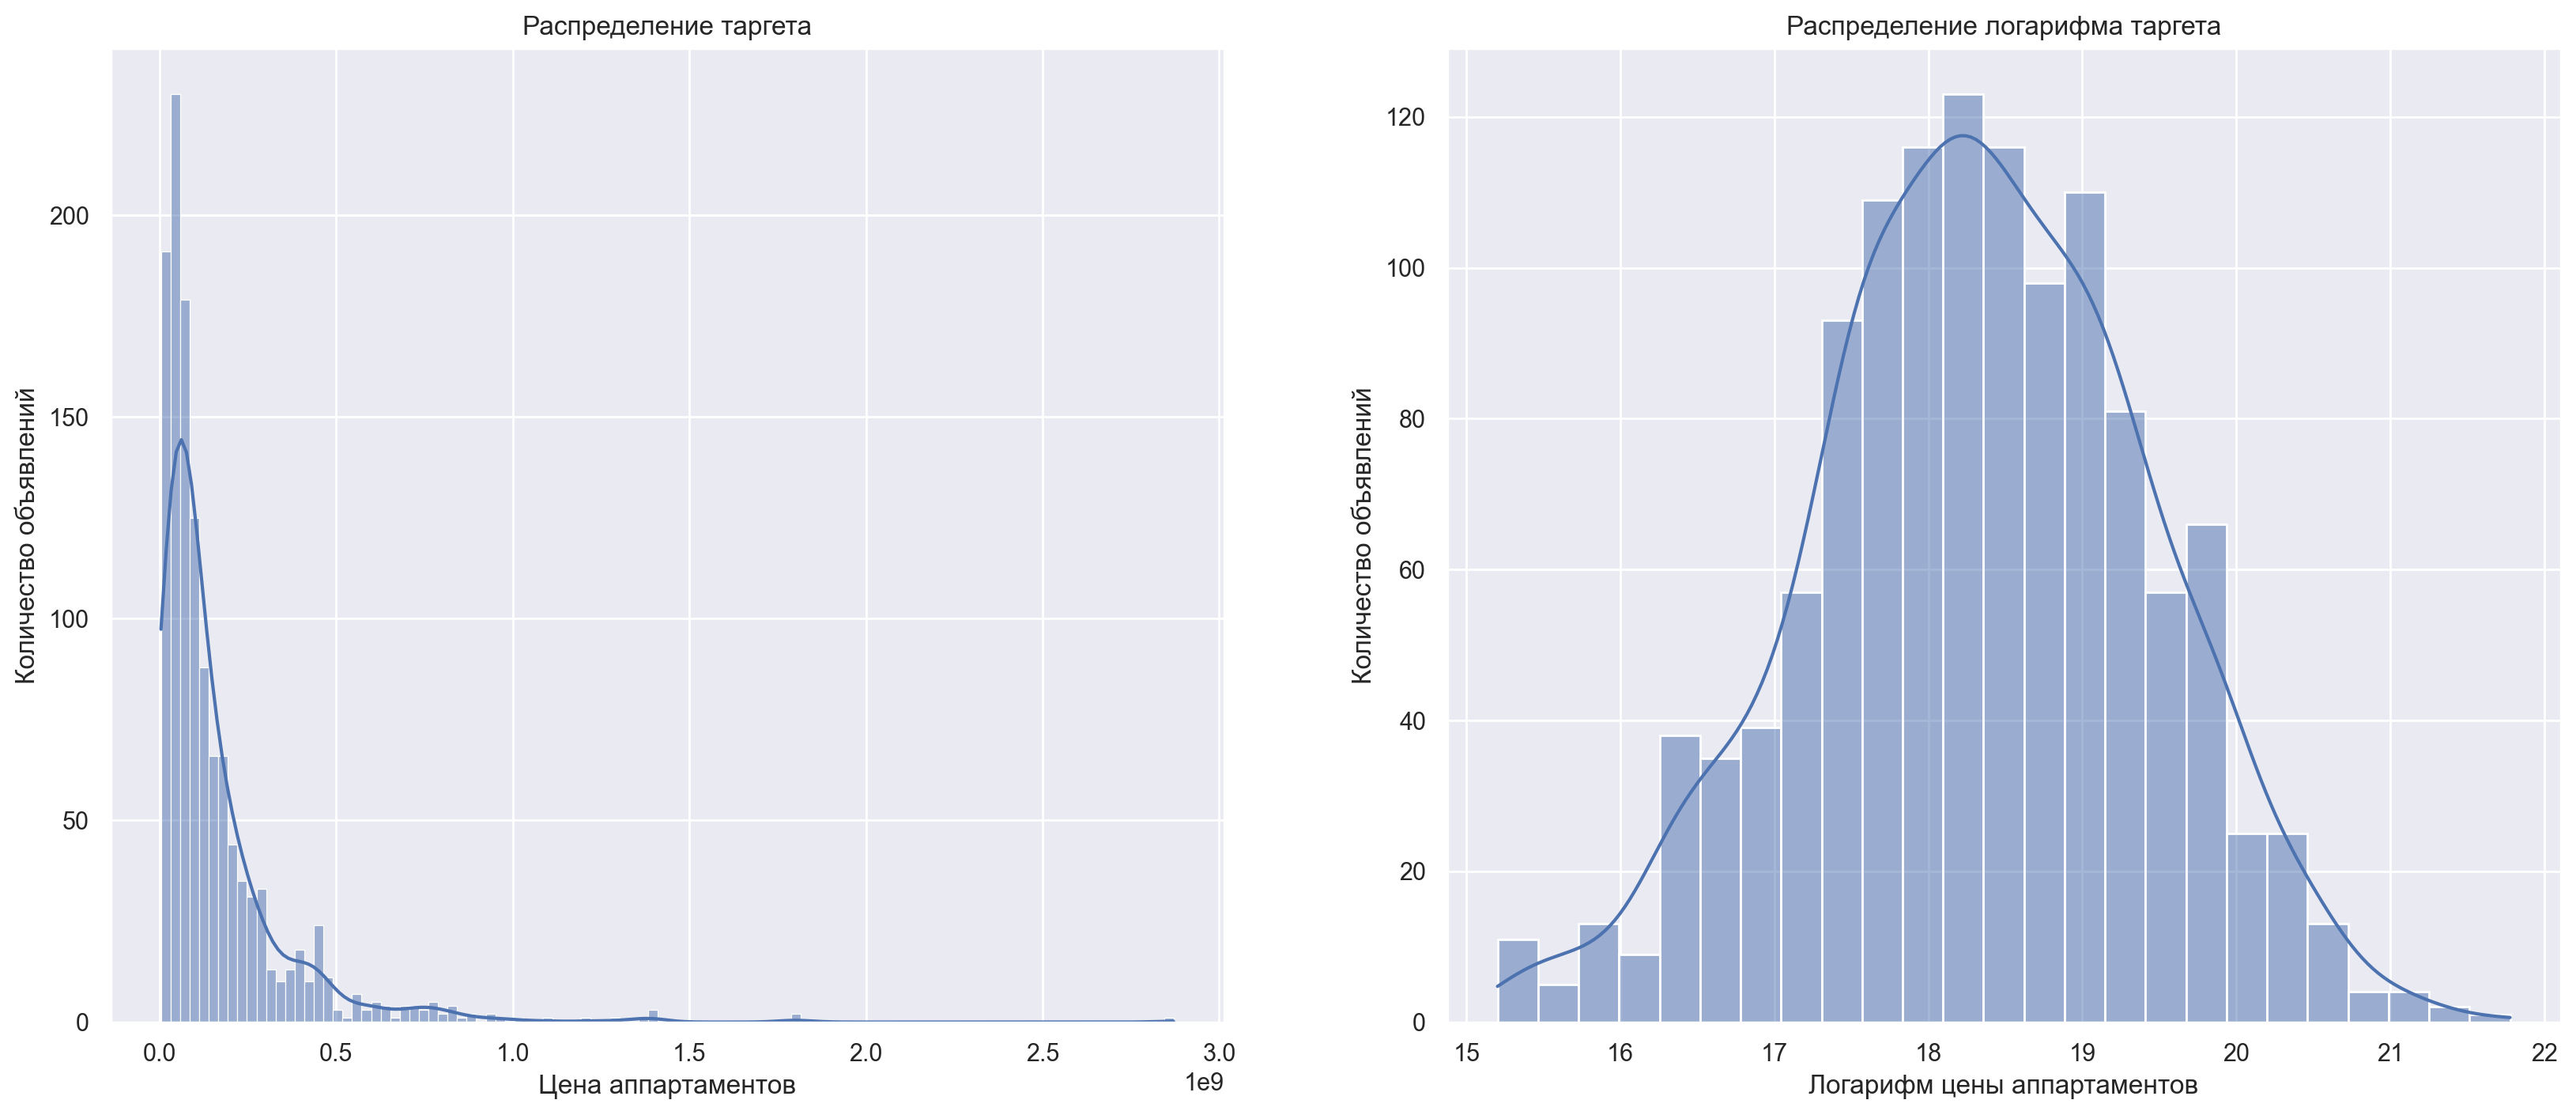

In [63]:
# Строим распределение таргета и его логарифма
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(main.price, kde=True, ax=axes[0])
axes[0].set(title="Распределение таргета",
            xlabel="Цена аппартаментов", ylabel="Количество объявлений")
sns.histplot(np.log1p(main.price), kde=True, ax=axes[1])
axes[1].set(title="Распределение логарифма таргета",
            xlabel="Логарифм цены аппартаментов", ylabel="Количество объявлений")
plt.show()

На левом графике видно, что цены сильно скошены вправо: большая часть объявлений сосредоточена на низких значениях, а редкие «дорогие» выбросы растягивают распределение и нарушают допущение нормальности и гомоскедастичности ошибок в линейной регрессии. После взятия логарифма (правый график) распределение становится почти нормальным, а разброс остатков — более равномерным. Благодаря этому модель стабильнее обучается, а коэффициенты легко интерпретировать как приблизительные процентные изменения цены.

С целевой переменной разобрались. Посмотрим на распределение категориальных признаков. Но для начала определим количество уникальных значений для каждого из них.

In [64]:
# Уникальные значения
for categorical in ['author_type', 'district',
       'residential_complex', 'ao']:
    print("unique", categorical, "-", main[categorical].nunique())

unique author_type - 6
unique district - 90
unique residential_complex - 306
unique ao - 9


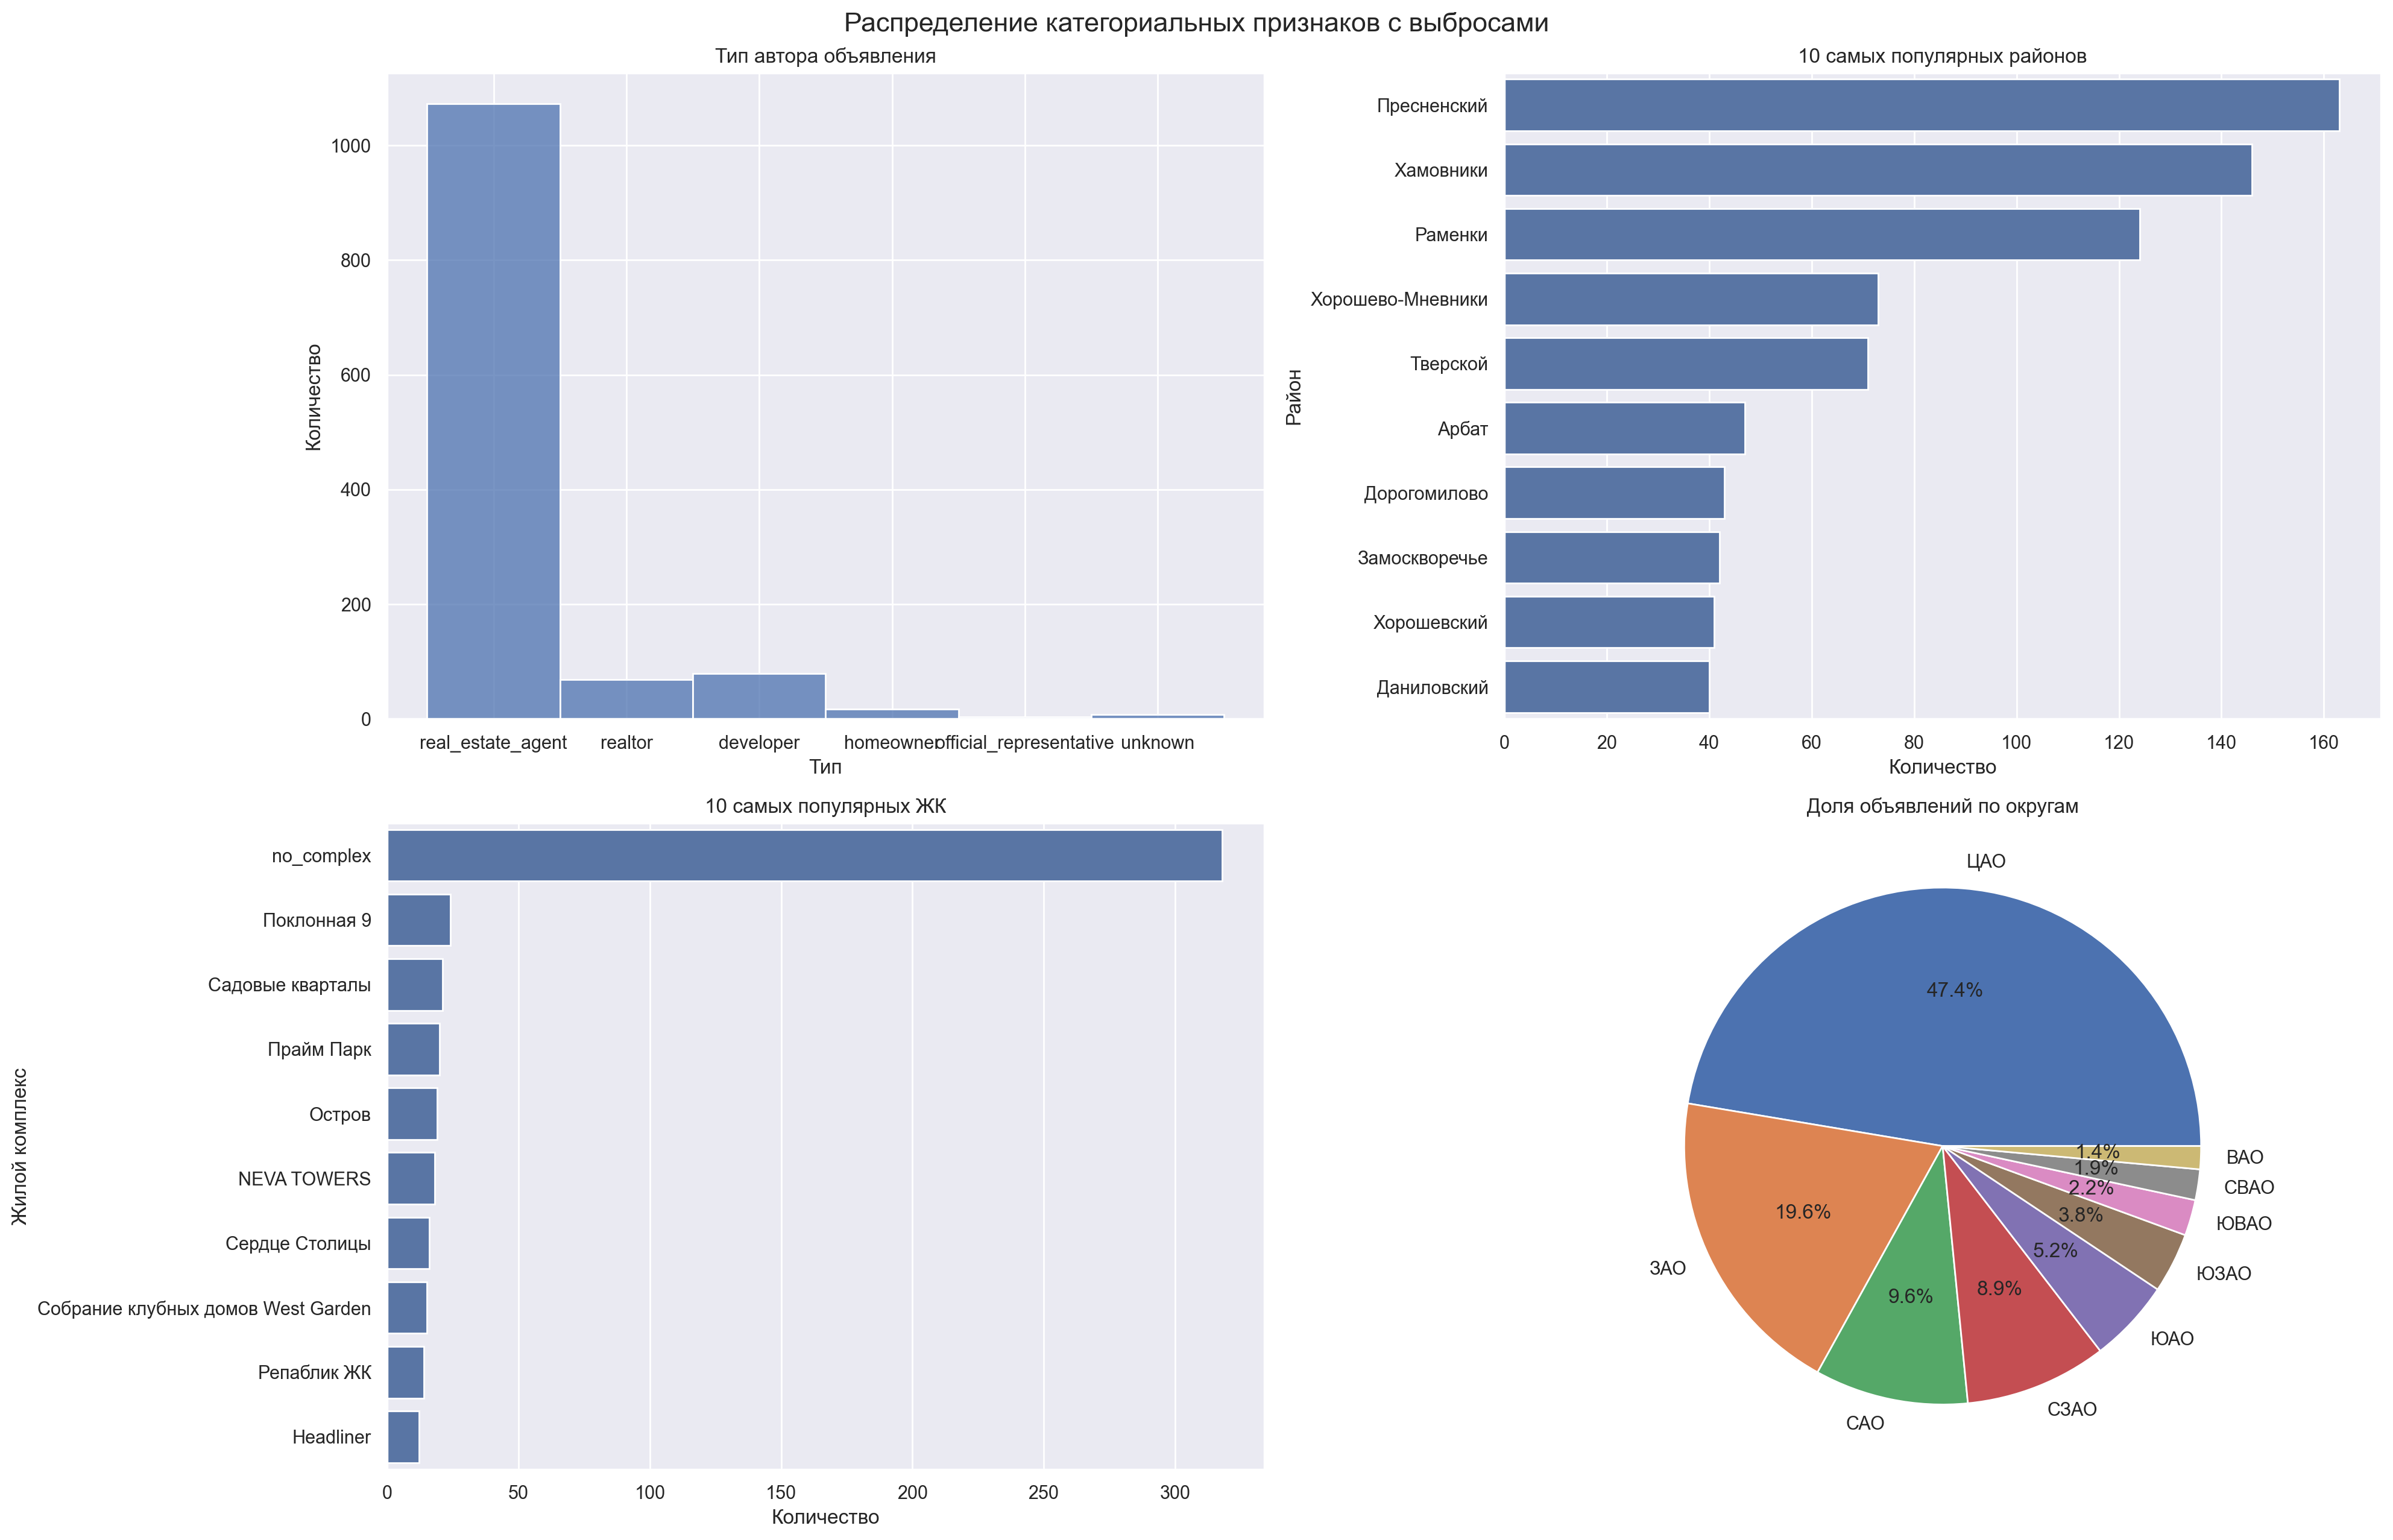

In [65]:
top_districts = main['district'].value_counts().head(10).index
top_complexes = main['residential_complex'].value_counts().head(10).index

fig, axes = plt.subplots(2, 2, figsize=(20, 13))
fig.suptitle('Распределение категориальных признаков с выбросами', fontsize=16)

sns.histplot(main['author_type'], ax=axes[0, 0])
axes[0, 0].set(title="Тип автора объявления", xlabel="Тип", ylabel="Количество")

sns.countplot(y='district', data=main[main['district'].isin(top_districts)], order=top_districts, ax=axes[0, 1])
axes[0, 1].set(title="10 самых популярных районов", xlabel="Количество", ylabel="Район")

sns.countplot(y='residential_complex', data=main[main['residential_complex'].isin(top_complexes)], order=top_complexes, ax=axes[1, 0])
axes[1, 0].set(title="10 самых популярных ЖК", xlabel="Количество", ylabel="Жилой комплекс")

main['ao'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set(title="Доля объявлений по округам", ylabel="")

plt.tight_layout()
plt.show()


Давайте сгруппируем редкие значения в категорию "Другие" для каждого признака.

In [66]:
main.loc[~main['district'].isin(top_districts), 'district'] = 'Другие'
main.loc[~main['residential_complex'].isin(main['residential_complex'].value_counts().head(20).index), 'residential_complex'] = 'Другие'

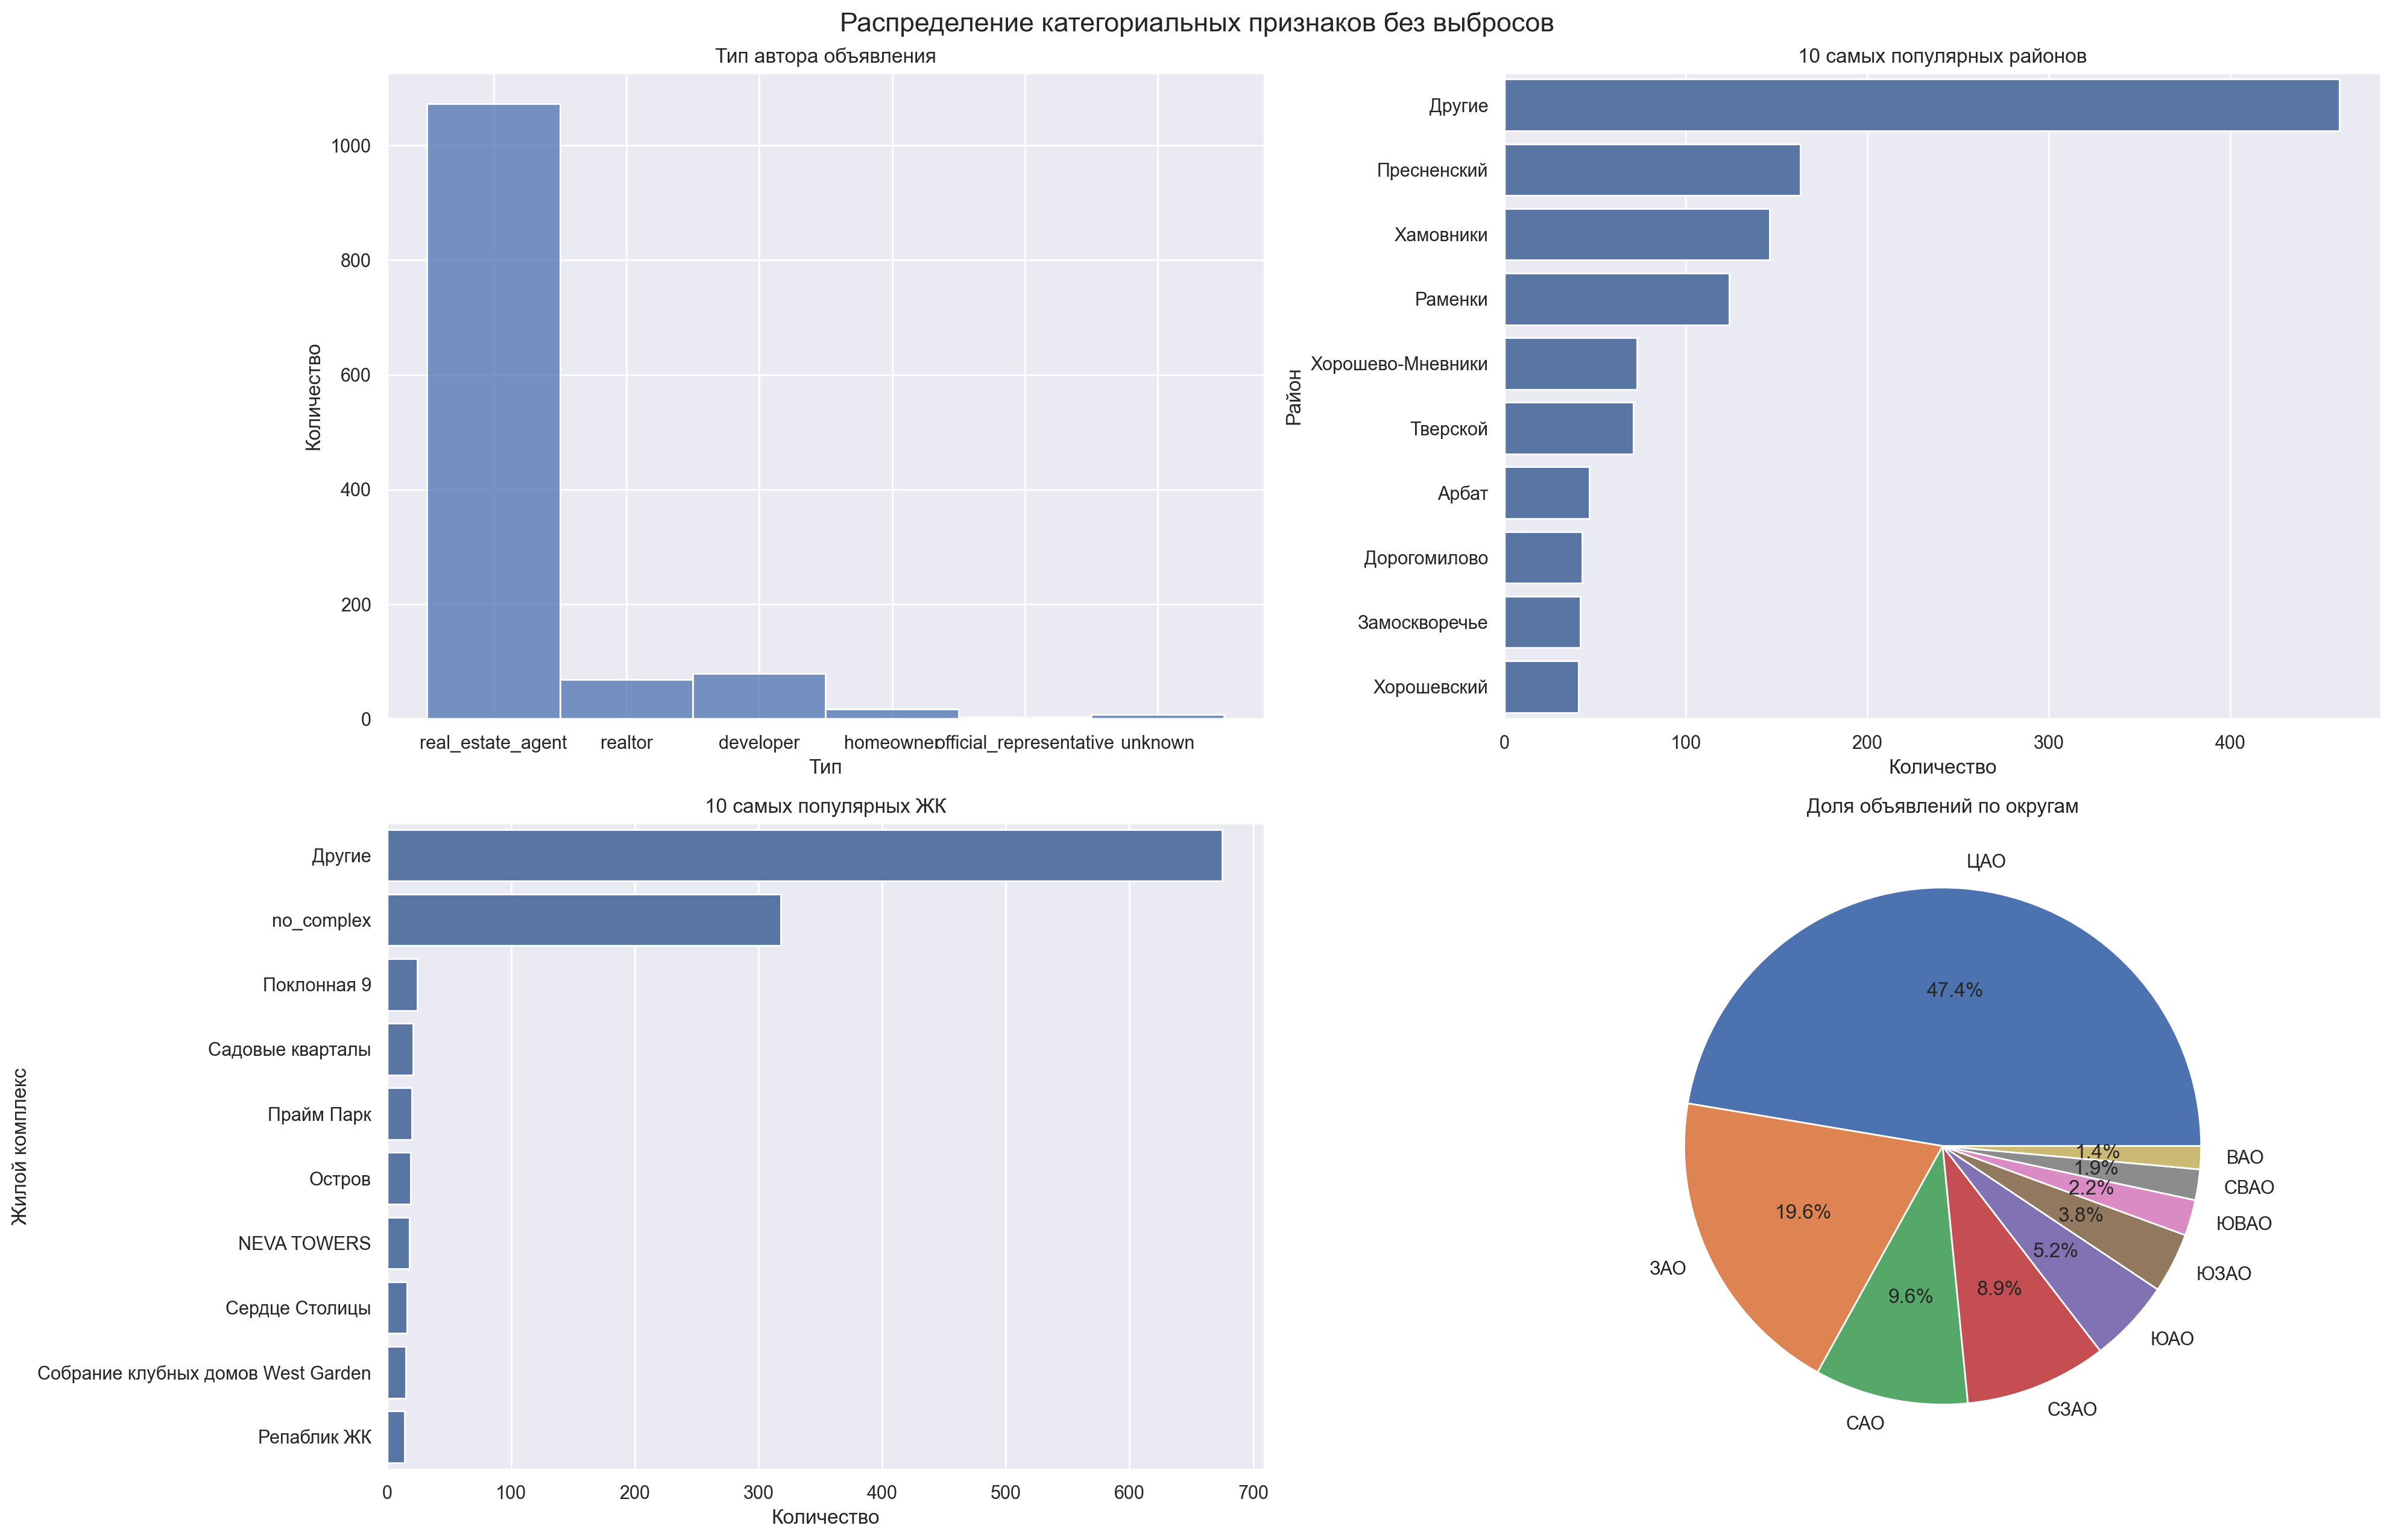

In [67]:
top_districts = main['district'].value_counts().head(10).index
top_complexes = main['residential_complex'].value_counts().head(10).index

fig, axes = plt.subplots(2, 2, figsize=(20, 13))
fig.suptitle('Распределение категориальных признаков без выбросов', fontsize=16)

sns.histplot(main['author_type'], ax=axes[0, 0])
axes[0, 0].set(title="Тип автора объявления", xlabel="Тип", ylabel="Количество")

sns.countplot(y='district', data=main[main['district'].isin(top_districts)], order=top_districts, ax=axes[0, 1])
axes[0, 1].set(title="10 самых популярных районов", xlabel="Количество", ylabel="Район")

sns.countplot(y='residential_complex', data=main[main['residential_complex'].isin(top_complexes)], order=top_complexes, ax=axes[1, 0])
axes[1, 0].set(title="10 самых популярных ЖК", xlabel="Количество", ylabel="Жилой комплекс")

main['ao'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set(title="Доля объявлений по округам", ylabel="")

plt.tight_layout()
plt.show()


Теперь посмотрим на распределение числовых признаков.

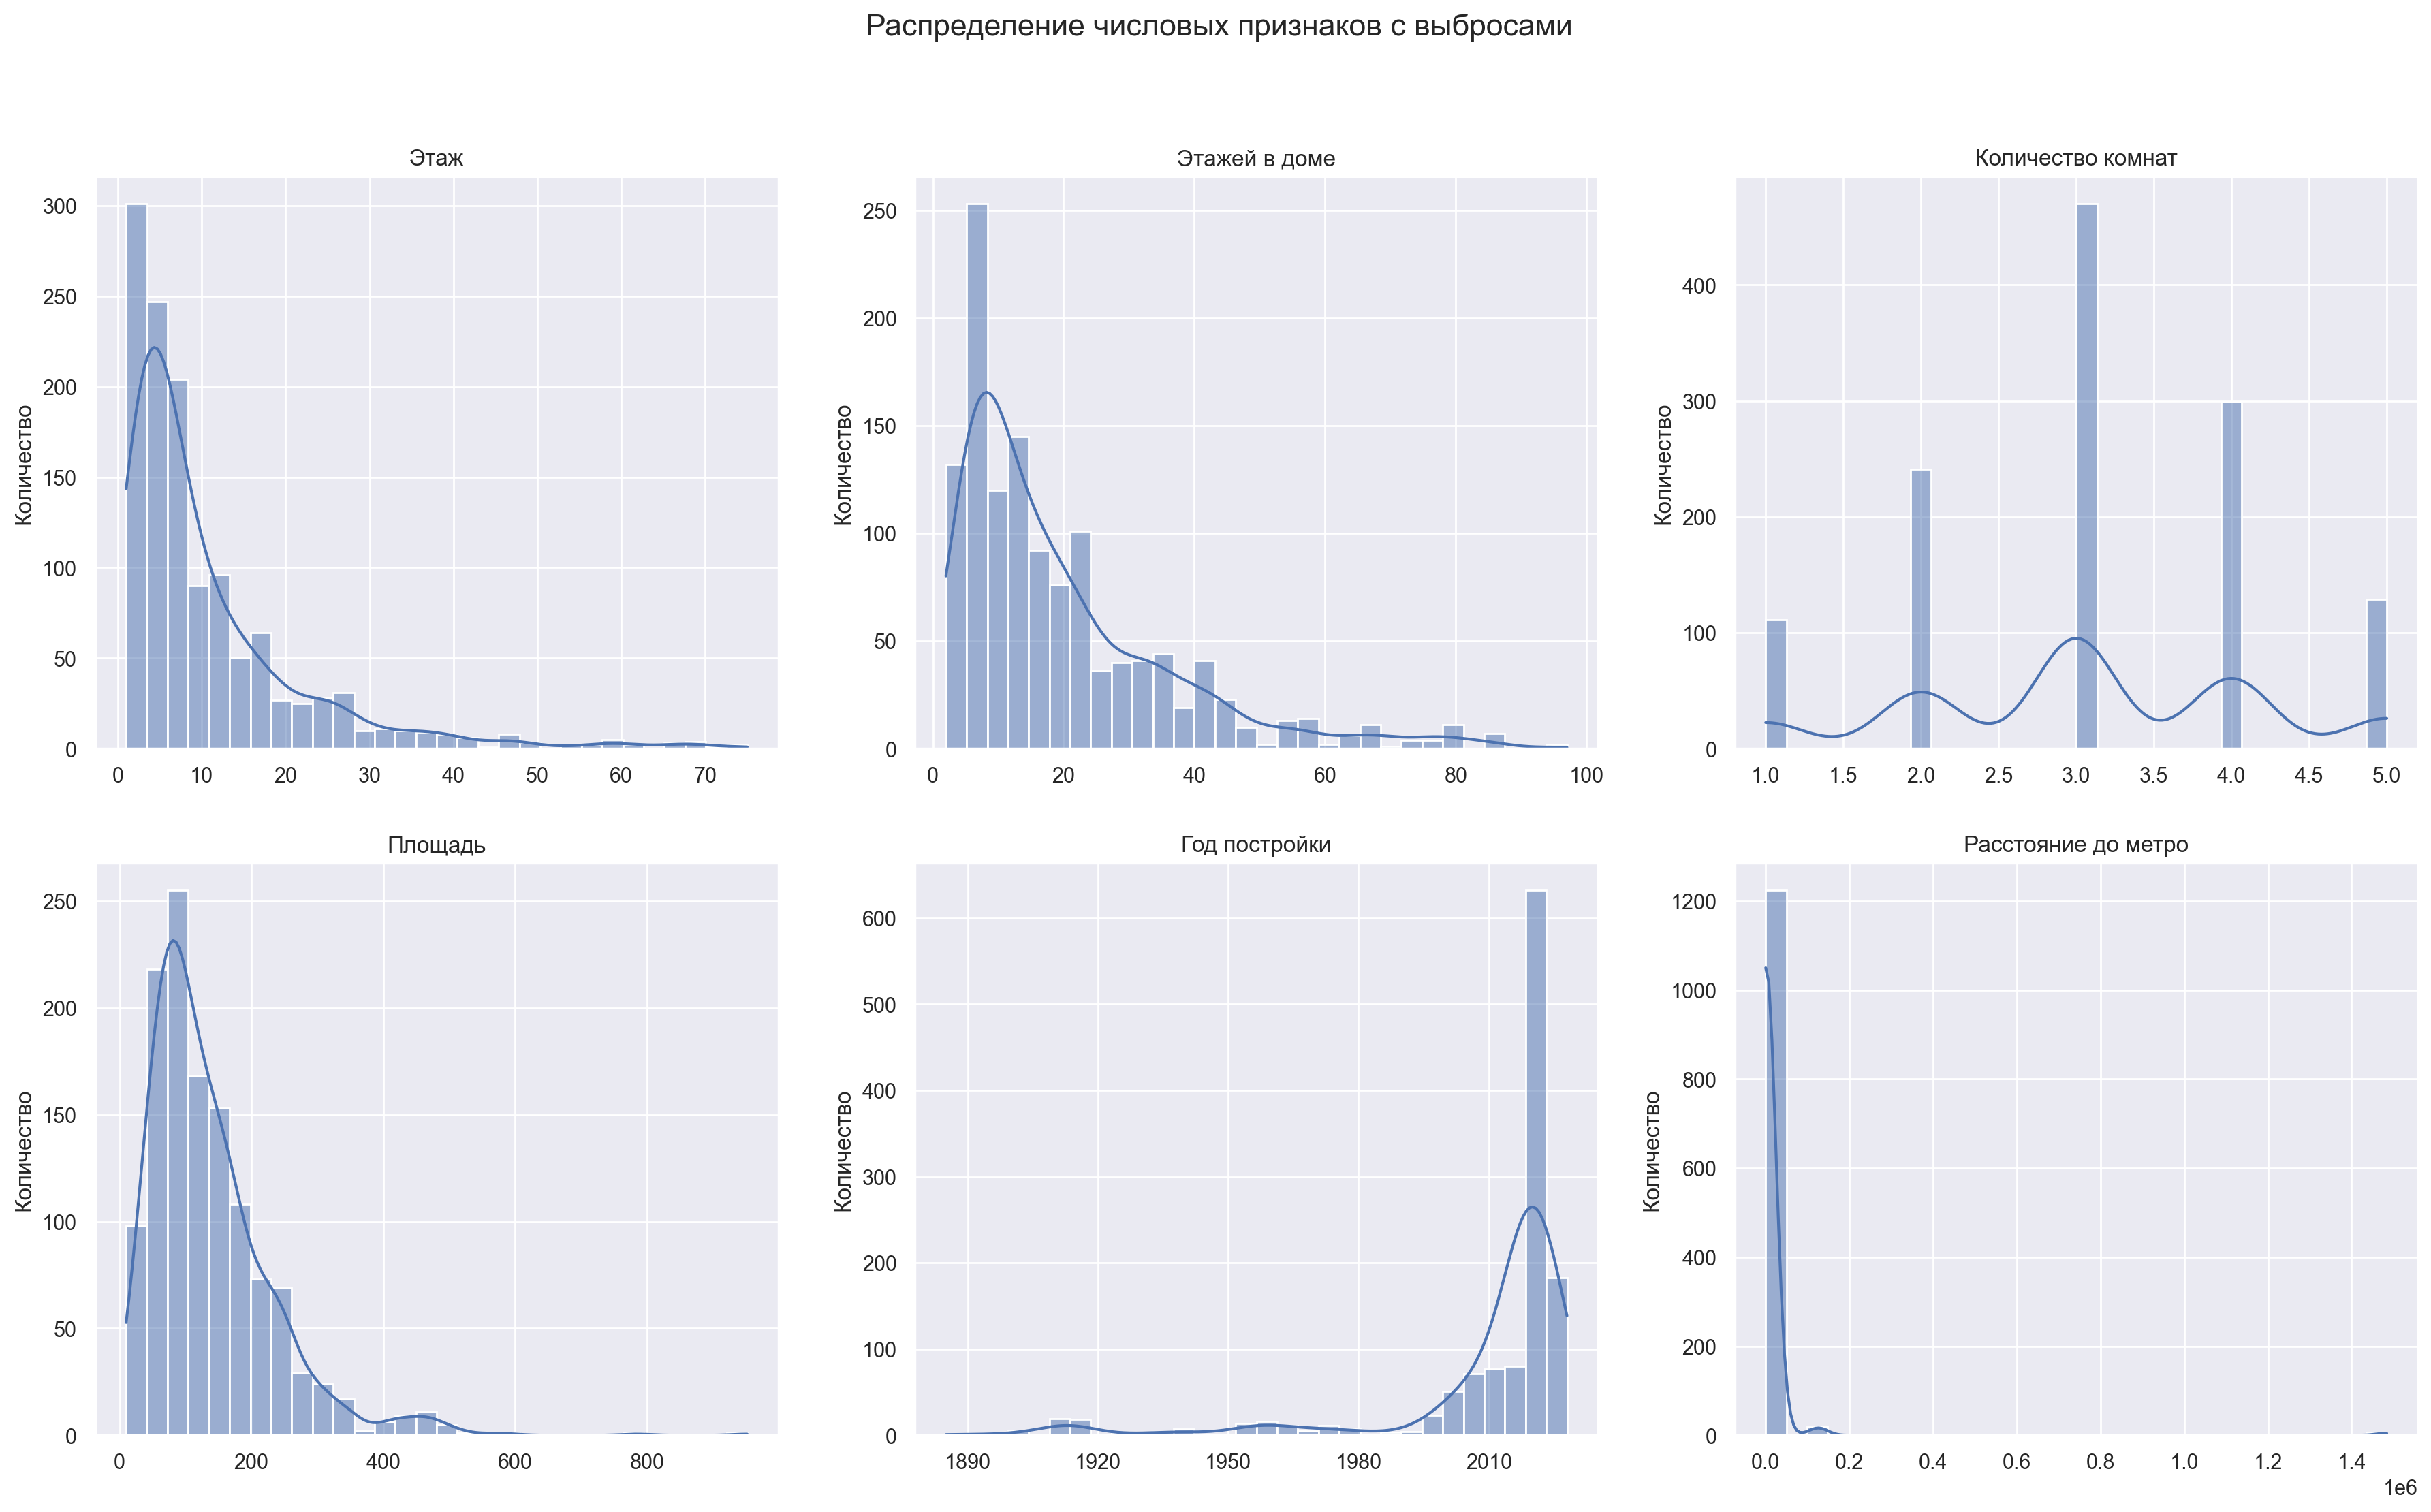

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
fig.suptitle('Распределение числовых признаков с выбросами', fontsize=16)

sns.histplot(main['floor'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set(title="Этаж", xlabel="", ylabel="Количество")

sns.histplot(main['floors_count'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set(title="Этажей в доме", xlabel="", ylabel="Количество")

sns.histplot(main['rooms_count'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set(title="Количество комнат", xlabel="", ylabel="Количество")

sns.histplot(main['total_meters'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set(title="Площадь", xlabel="", ylabel="Количество")

sns.histplot(main['year_of_construction'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set(title="Год постройки", xlabel="", ylabel="Количество")
axes[1, 1].xaxis.set_major_locator(plt.MaxNLocator(6))

sns.histplot(main['metro_distance'], bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set(title="Расстояние до метро", xlabel="", ylabel="Количество")

plt.show()


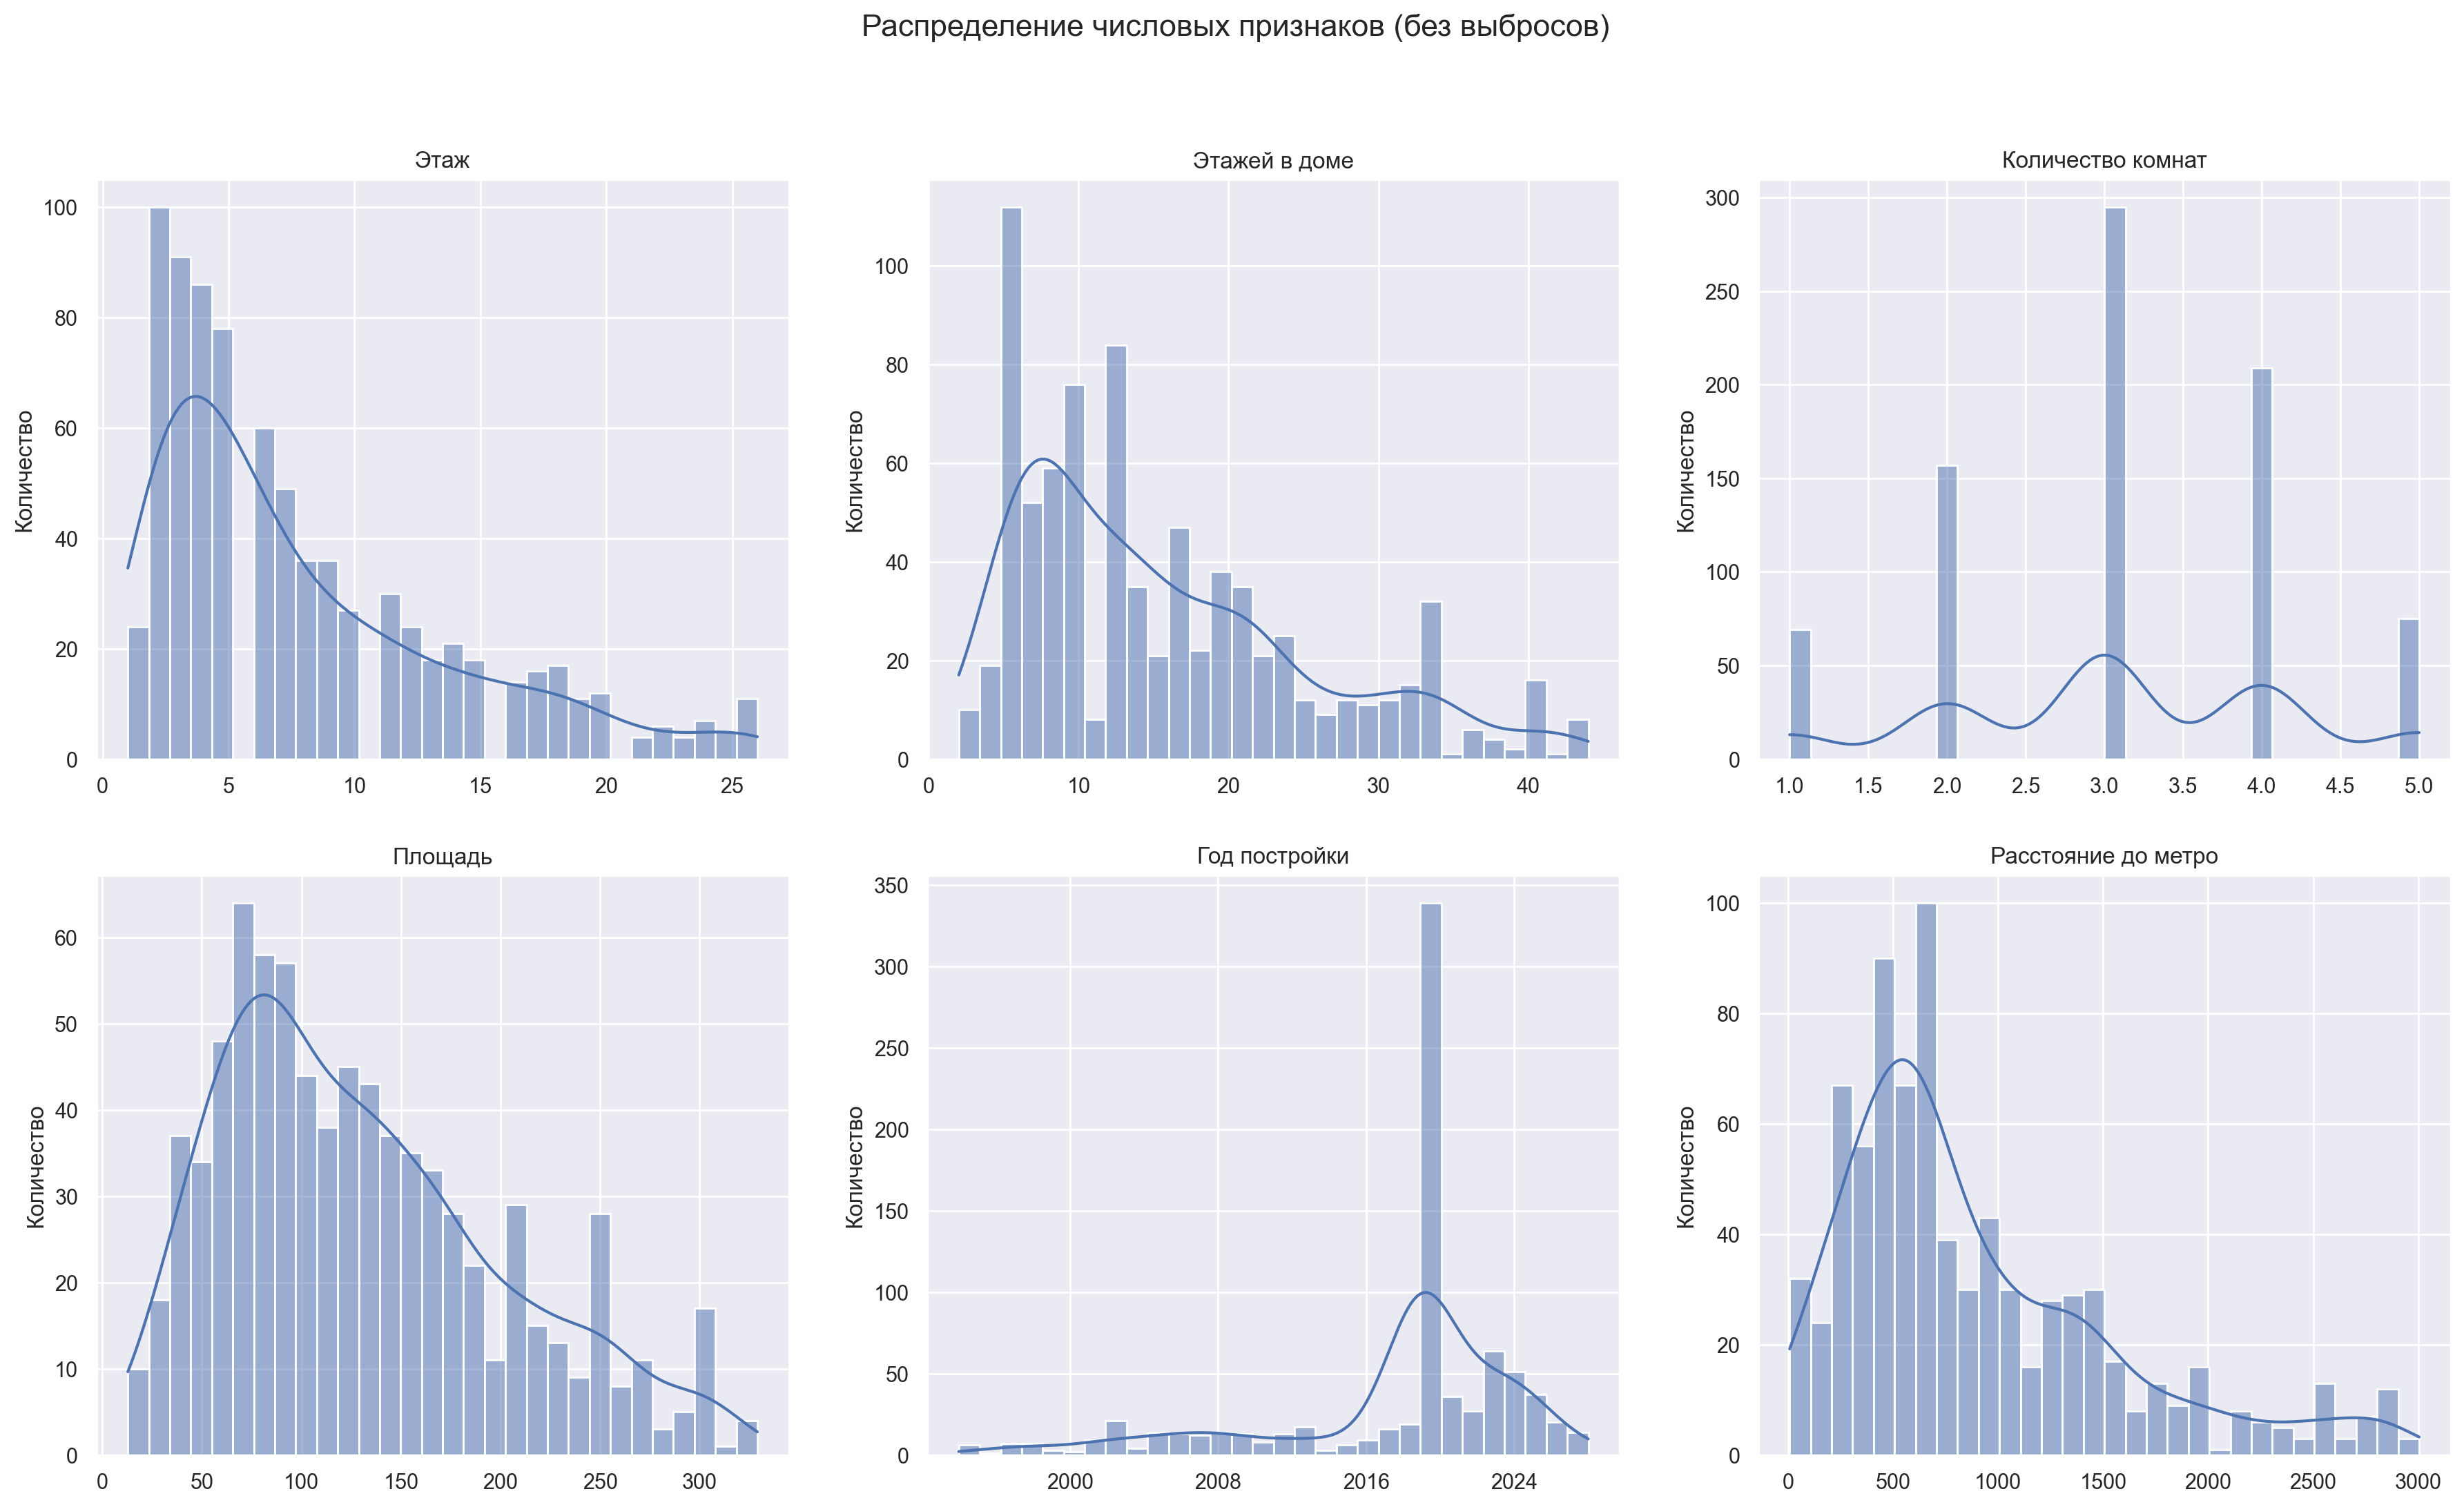

In [69]:
def filter_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

num_cols = [
    'floor',
    'floors_count',
    'rooms_count',
    'total_meters',
    'year_of_construction',
    'metro_distance'
]

filtered = main.copy()
for c in num_cols:
    filtered = filter_iqr(filtered, c)

fig, axes = plt.subplots(2, 3, figsize=(22, 12))
fig.suptitle('Распределение числовых признаков (без выбросов)', fontsize=16)

sns.histplot(filtered['floor'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set(title="Этаж", xlabel="", ylabel="Количество")

sns.histplot(filtered['floors_count'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set(title="Этажей в доме", xlabel="", ylabel="Количество")

sns.histplot(filtered['rooms_count'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set(title="Количество комнат", xlabel="", ylabel="Количество")

sns.histplot(filtered['total_meters'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set(title="Площадь", xlabel="", ylabel="Количество")

sns.histplot(filtered['year_of_construction'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set(title="Год постройки", xlabel="", ylabel="Количество")
axes[1, 1].xaxis.set_major_locator(plt.MaxNLocator(6))

sns.histplot(filtered['metro_distance'], bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set(title="Расстояние до метро", xlabel="", ylabel="Количество")

plt.show()


In [70]:
main = filtered

Давайте отрежем выбросы.

3. Зависимости

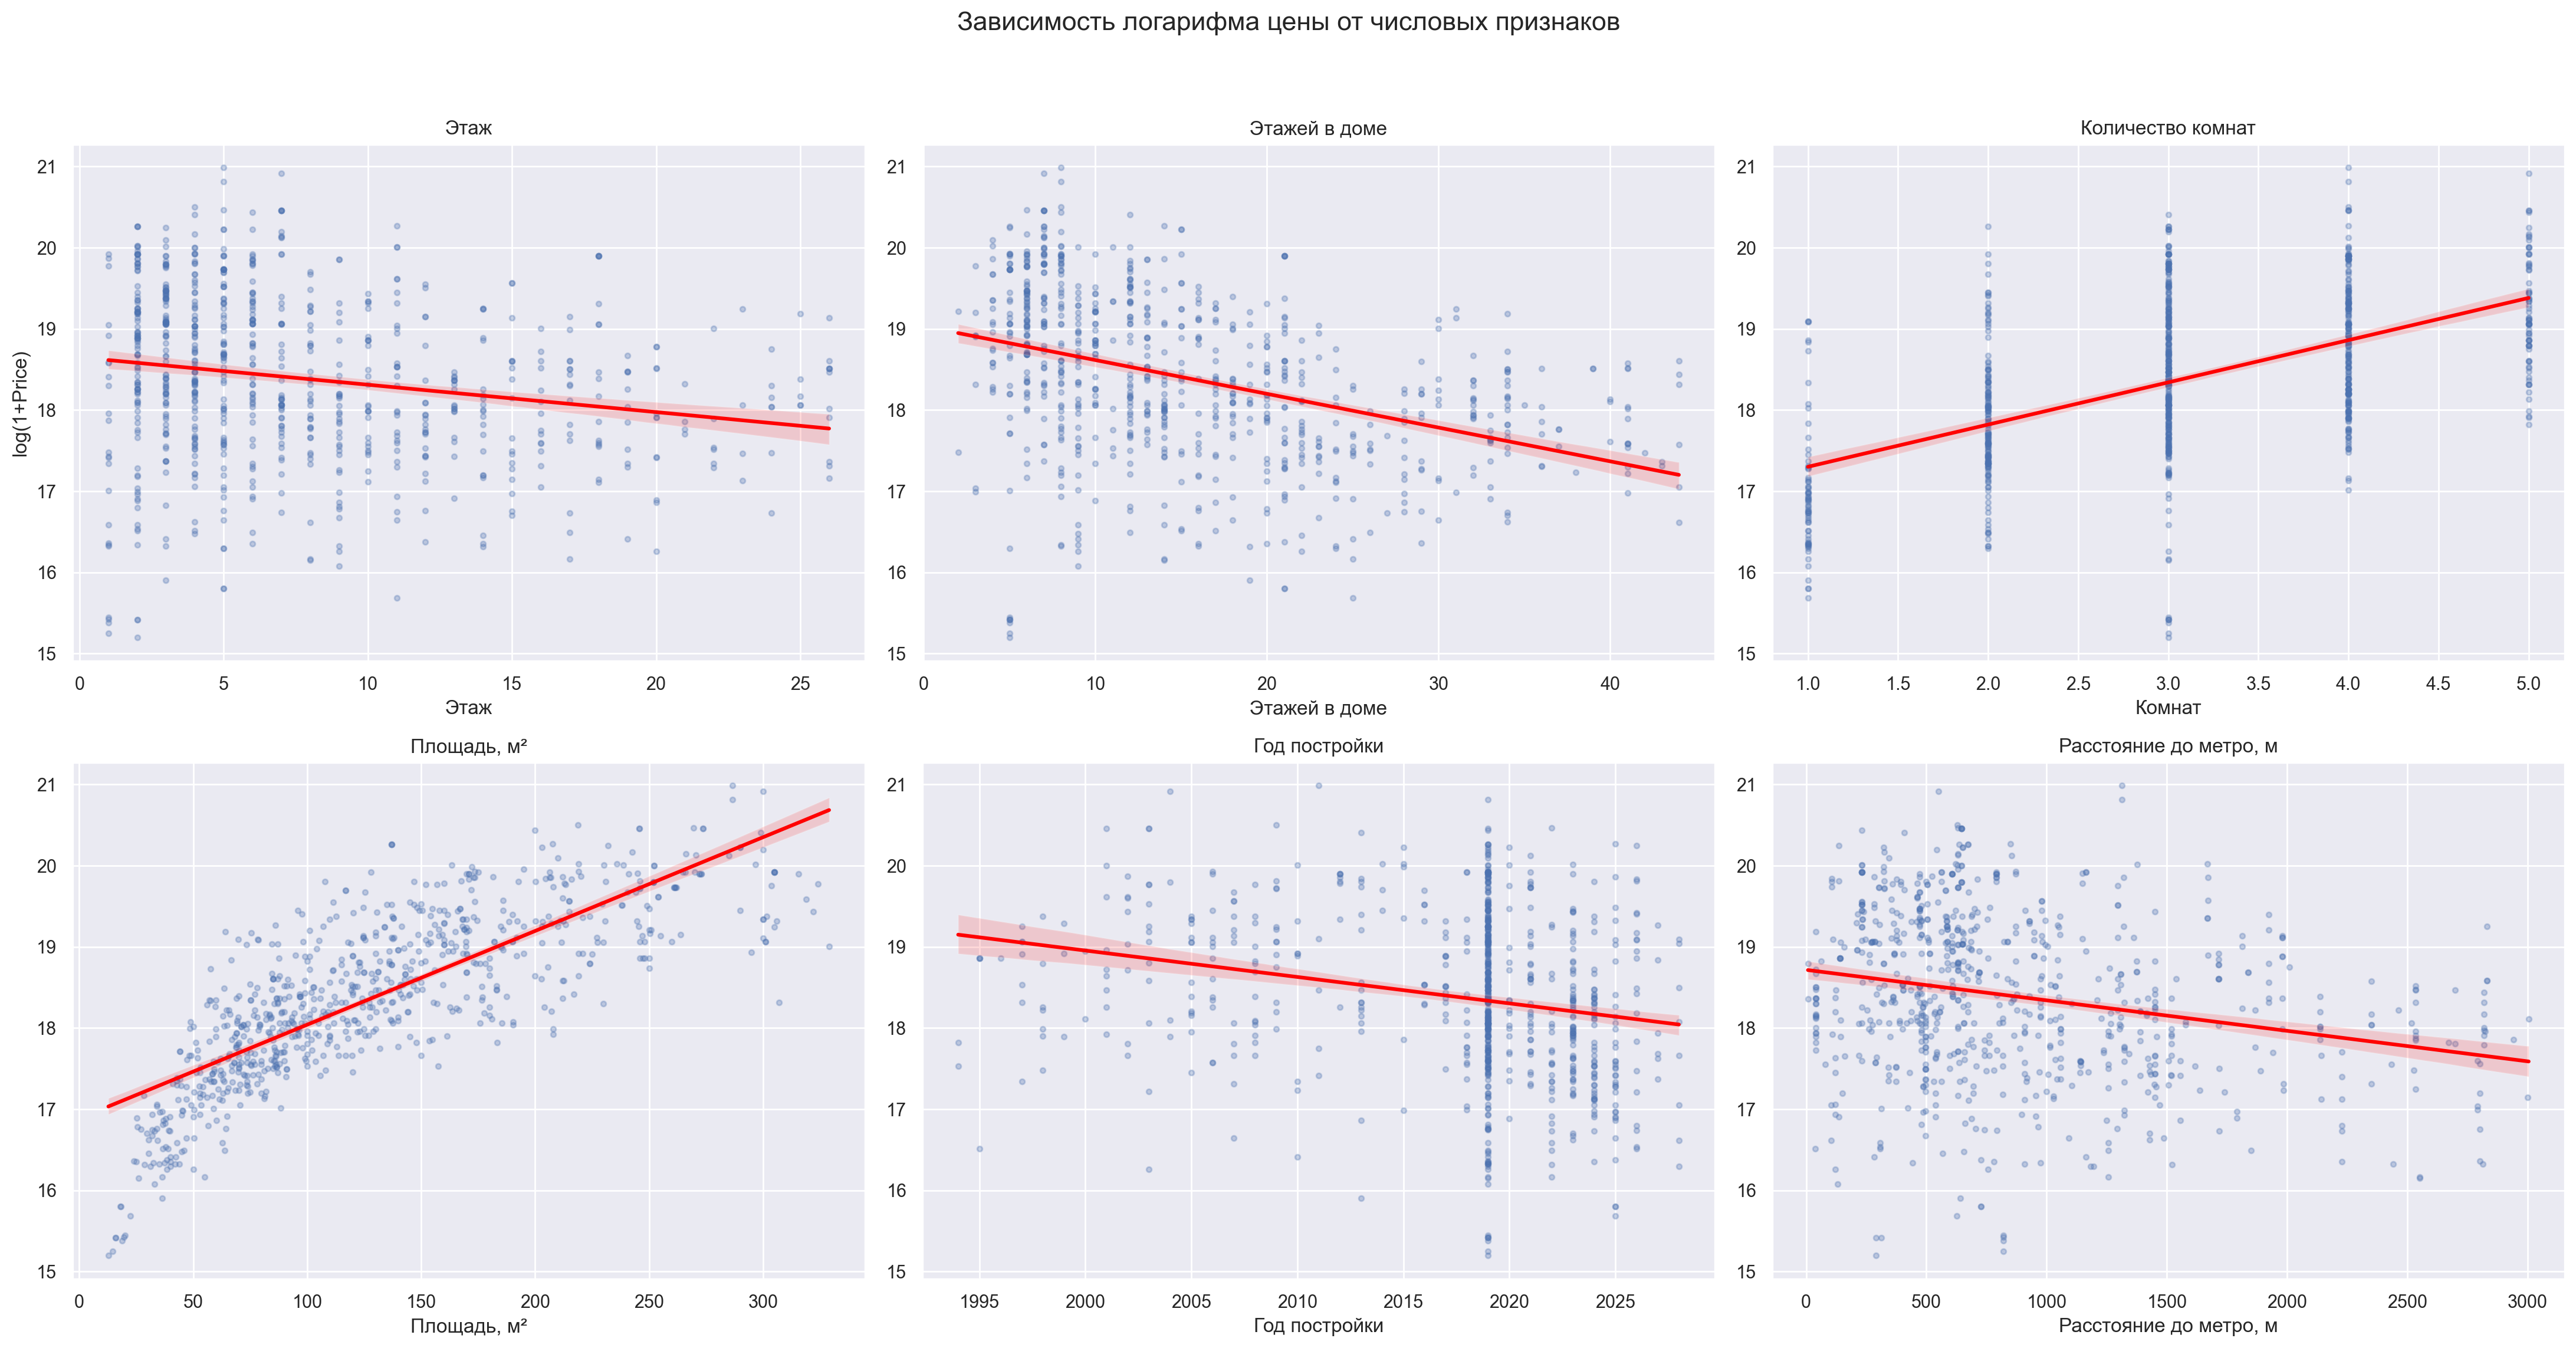

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
fig.suptitle('Зависимость логарифма цены от числовых признаков', fontsize=16)

sns.regplot(
    x='floor', y=np.log1p(main['price']), data=main,
    scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'},
    ax=axes[0, 0]
)
axes[0, 0].set(title='Этаж', xlabel='Этаж', ylabel='log(1+Price)')

sns.regplot(
    x='floors_count', y=np.log1p(main['price']), data=main,
    scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'},
    ax=axes[0, 1]
)
axes[0, 1].set(title='Этажей в доме', xlabel='Этажей в доме', ylabel='')

sns.regplot(
    x='rooms_count', y=np.log1p(main['price']), data=main,
    scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'},
    ax=axes[0, 2]
)
axes[0, 2].set(title='Количество комнат', xlabel='Комнат', ylabel='')

sns.regplot(
    x='total_meters', y=np.log1p(main['price']), data=main,
    scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'},
    ax=axes[1, 0]
)
axes[1, 0].set(title='Площадь, м²', xlabel='Площадь, м²', ylabel='')

sns.regplot(
    x='year_of_construction', y=np.log1p(main['price']), data=main,
    scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'},
    ax=axes[1, 1]
)
axes[1, 1].set(title='Год постройки', xlabel='Год постройки', ylabel='')

sns.regplot(
    x='metro_distance', y=np.log1p(main['price']), data=main,
    scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'},
    ax=axes[1, 2]
)
axes[1, 2].set(title='Расстояние до метро, м', xlabel='Расстояние до метро, м', ylabel='')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Исходя из графиков (рисунок 6), этаж, количество этажей в доме, год постройки здания, расстояние до метро оказывают отрицательное влияние на логарифм цены квартиры. Площадь и количество комнат оказывают более явное положительное влияние.

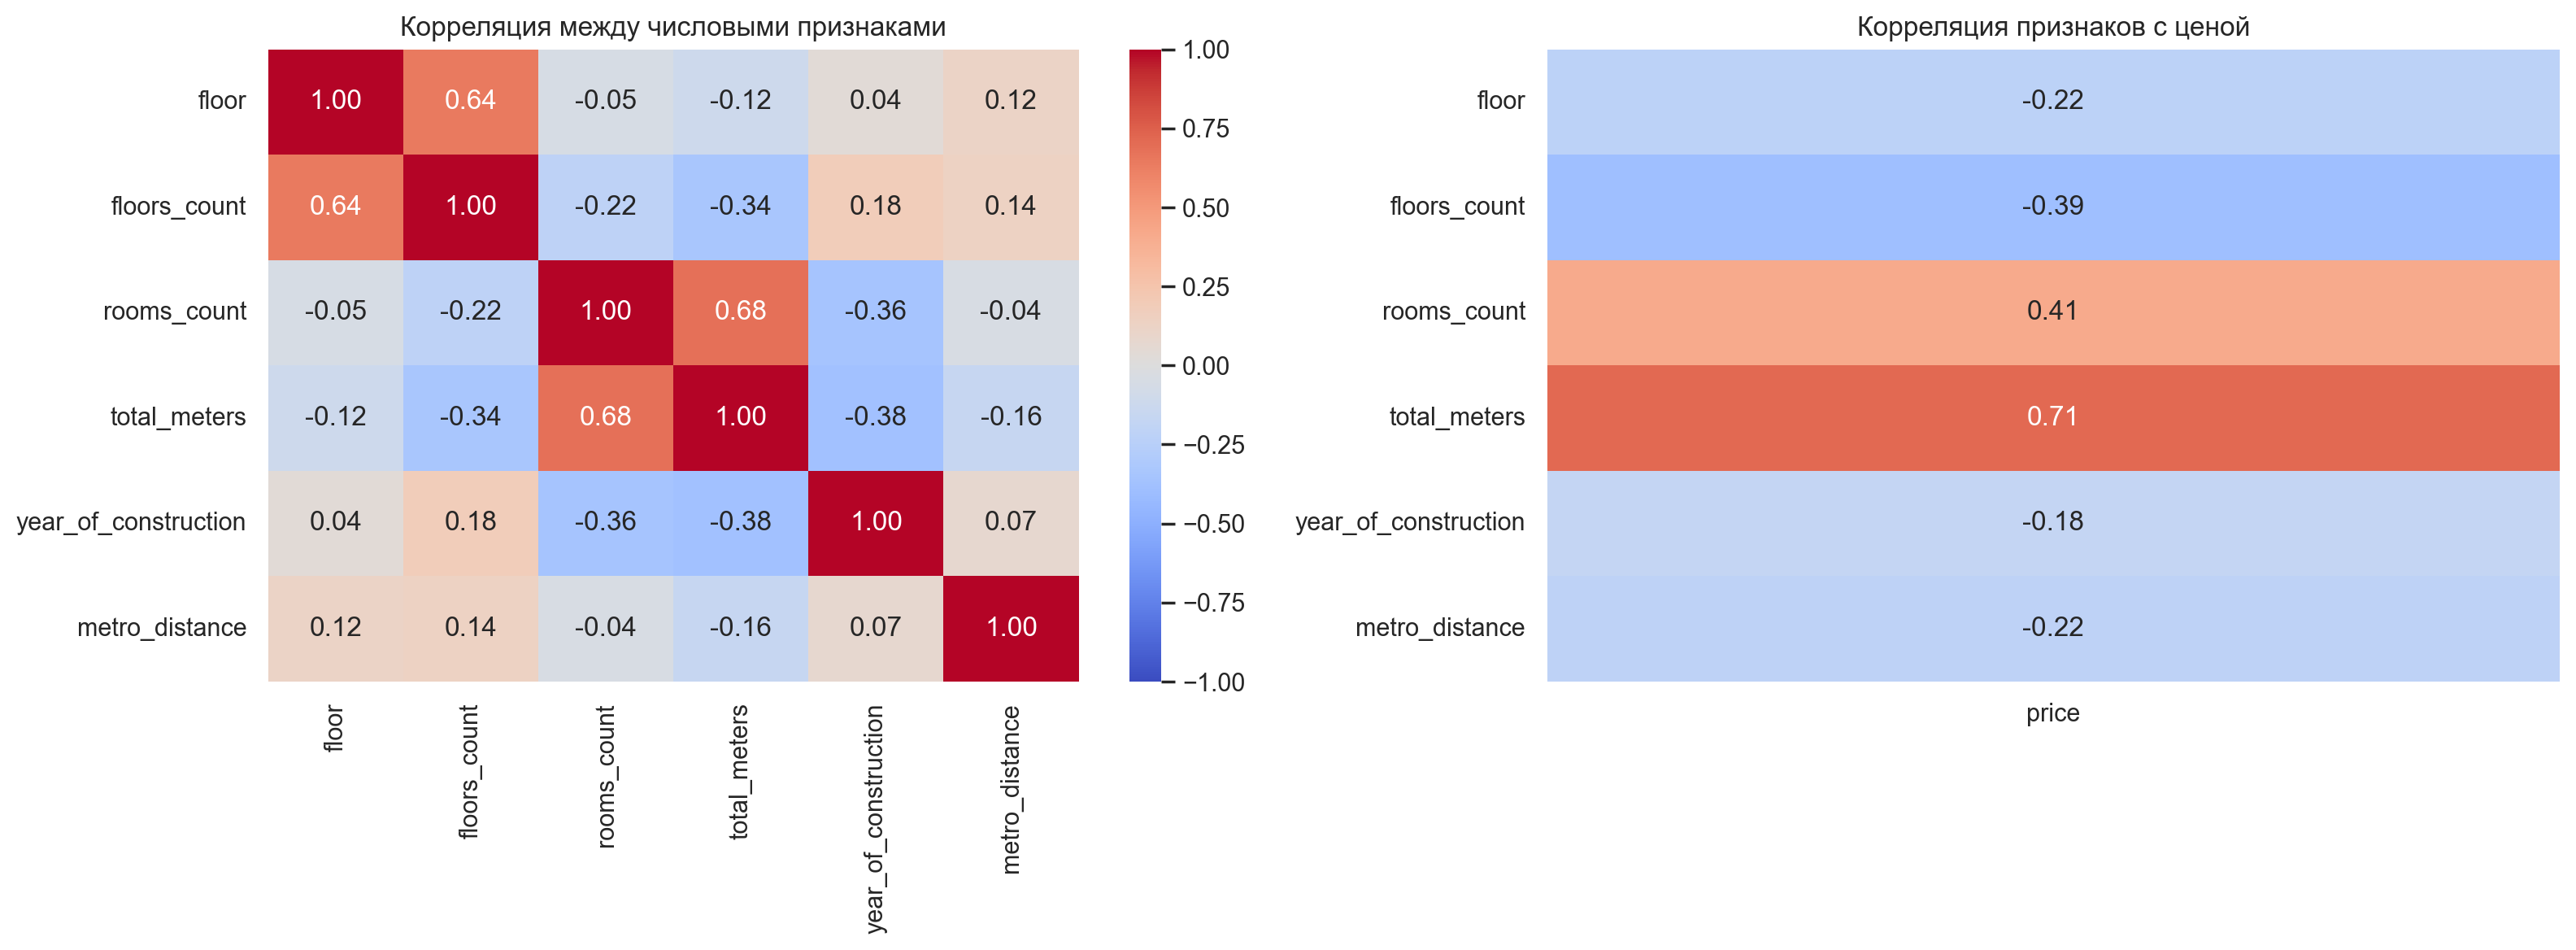

In [72]:
num_feats = [
    'floor',
    'floors_count',
    'rooms_count',
    'total_meters',
    'year_of_construction',
    'metro_distance'
]

df_corr = main[num_feats + ['price']]
corr_feats = df_corr[num_feats].corr()
corr_target = df_corr[num_feats].corrwith(df_corr['price']).to_frame('price')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(
    corr_feats,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    ax=axes[0]
)
axes[0].set_title("Корреляция между числовыми признаками")

sns.heatmap(
    corr_target,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar=False,
    ax=axes[1]
)
axes[1].set_title("Корреляция признаков с ценой")

plt.tight_layout()
plt.show()


Большинство признаков имеют слабую корреляцию между друг другом. Однако пары количества комнат и площади, этажа и количества этажей в доме имеют достаточно высокую корреляцию. Это логично. Чем больше площадь, тем больше комнат, чем больше этажей в доме, тем выше может быть этаж квартиры. Чтобы избежать мультиколлинеарности, придется исключить по одному признаку. Оставим количество этажей и площадь, так как они имеют более высокие значения корреляции по модулю с зависимой переменной. (Комментарий после сдачи proposal: была допущена ошибка с исключением переменных floor и rooms_count в связи с присутствием мультиколлинеарности. Такой подходит приведет к смещенным и несостоятельным оценкам. Возникает проблема эндогенности. Все признаки, которые содержательно влияют на зависимую переменную, должны быть включены в модель.) Остальные признаки имеют слабую корреляцию с таргетом. 

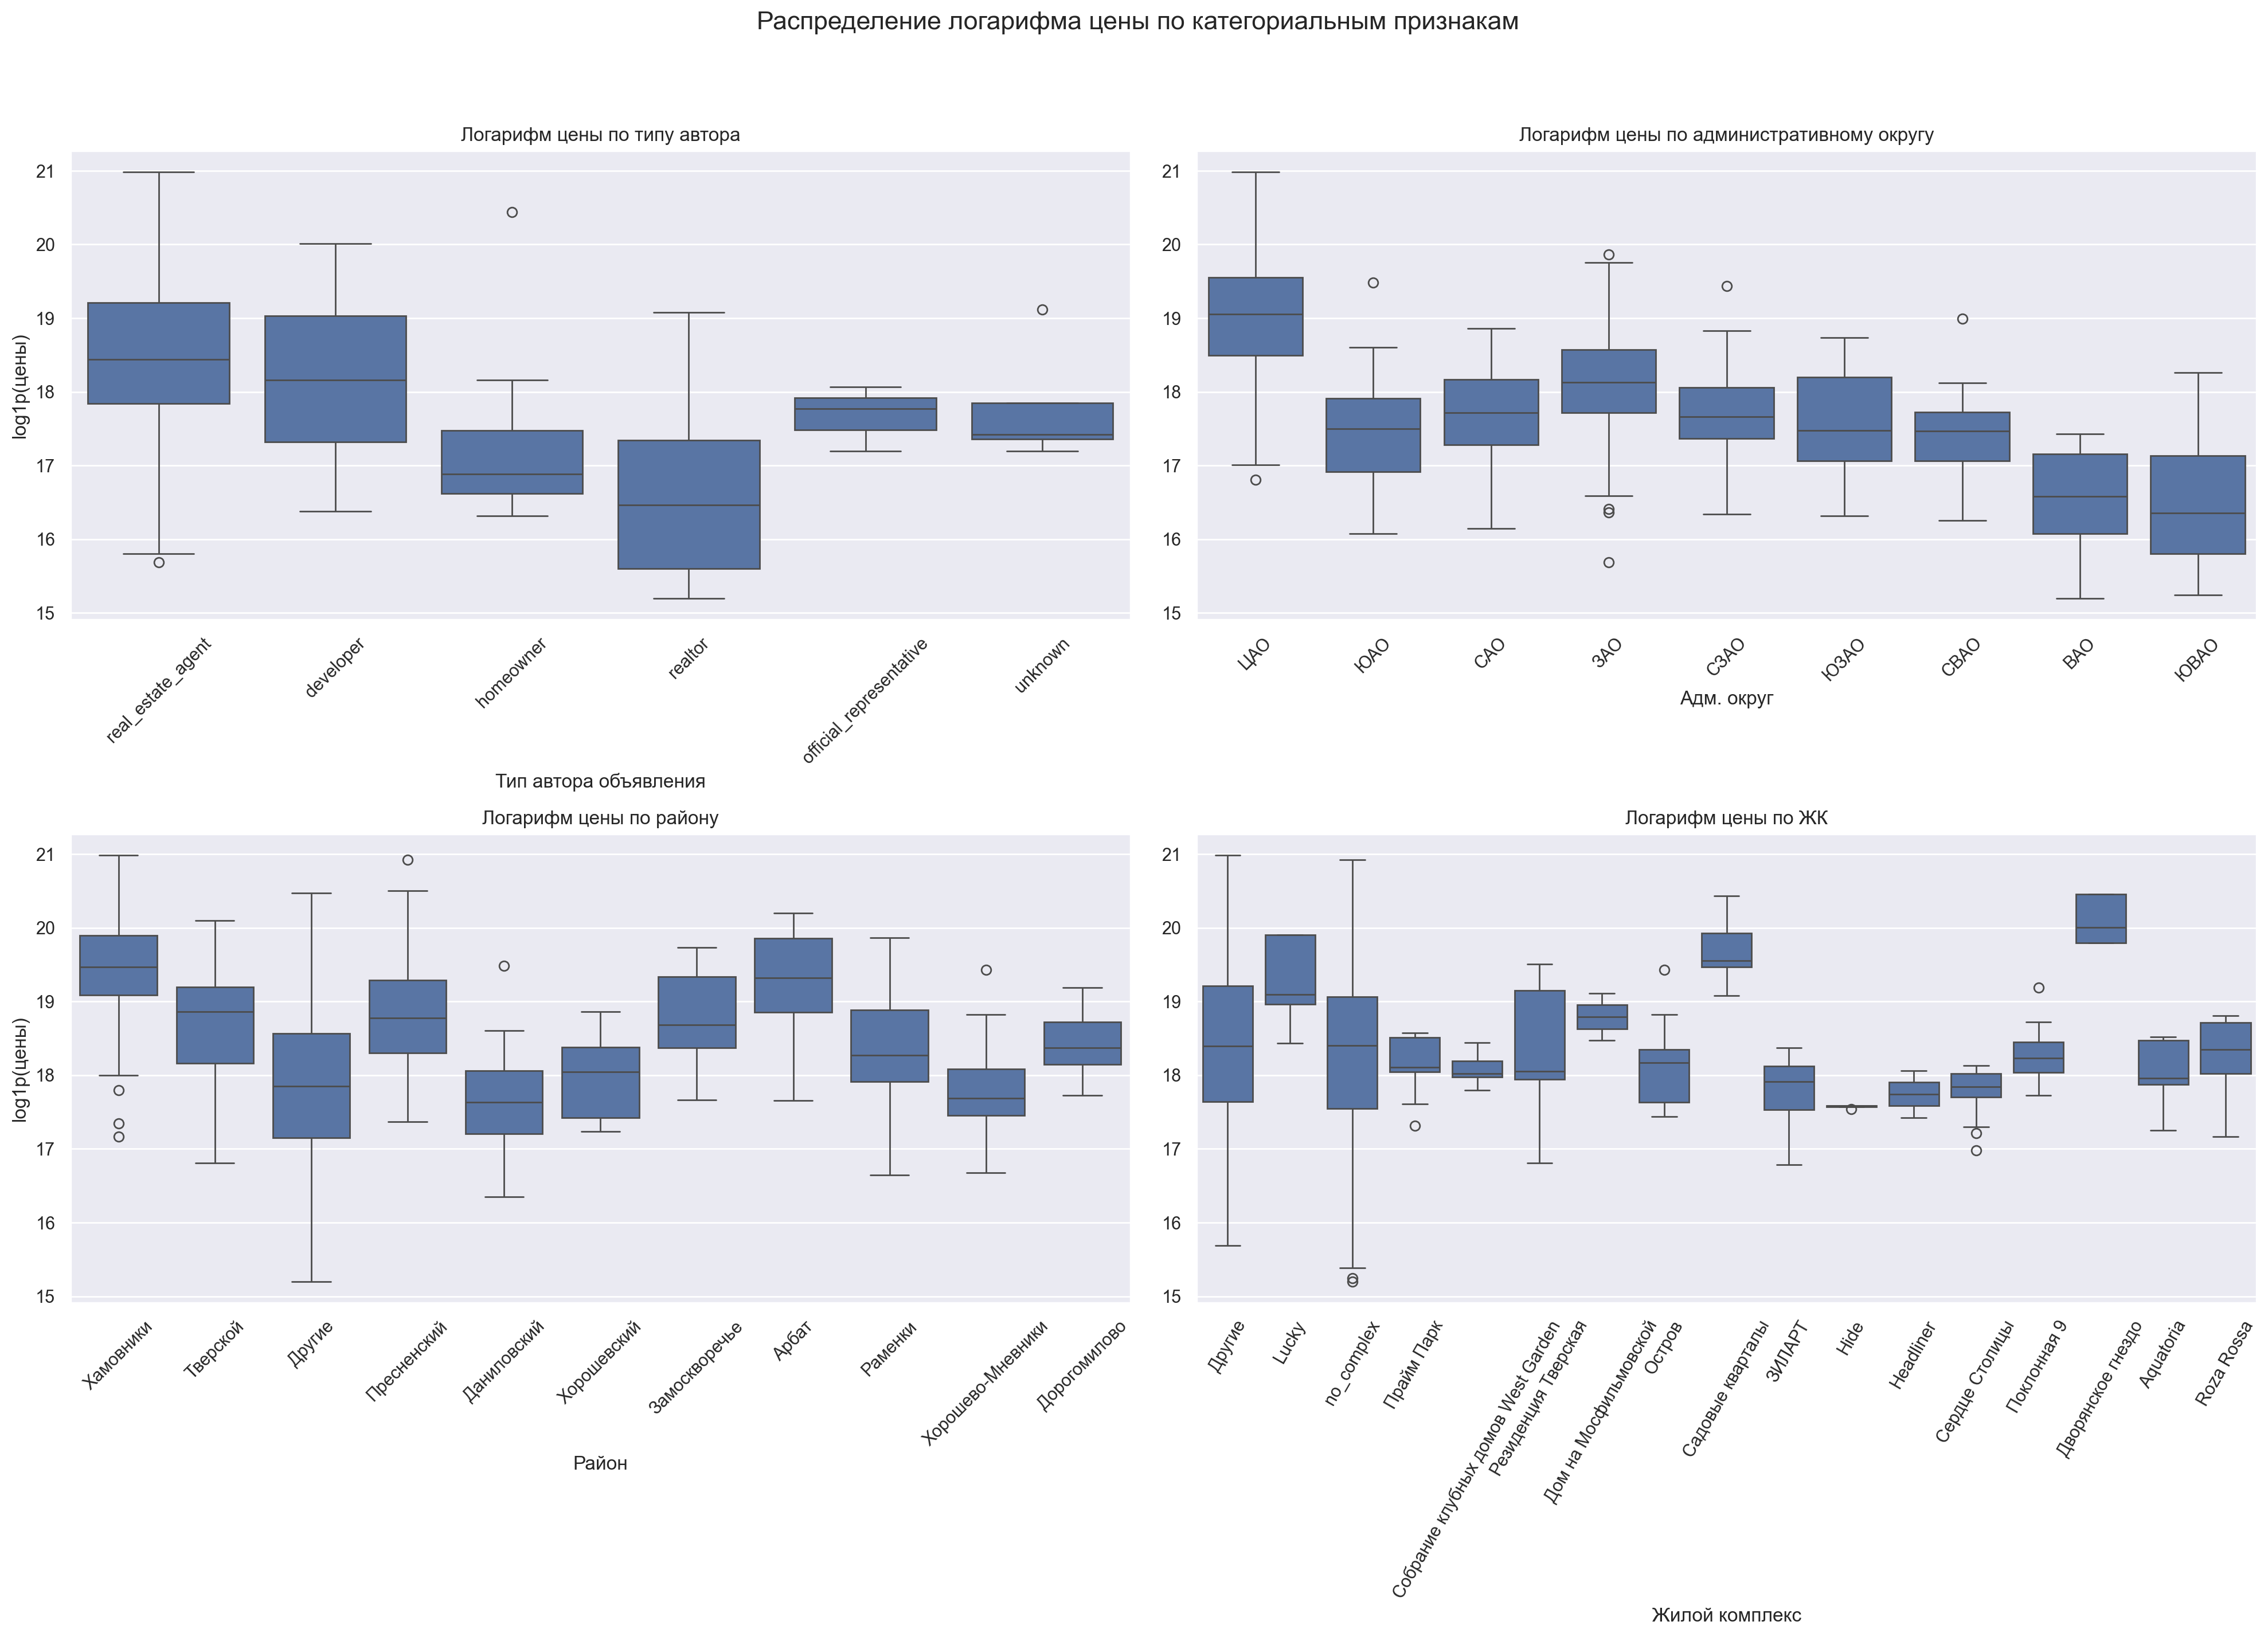

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Распределение логарифма цены по категориальным признакам', fontsize=16)

sns.boxplot(
    x='author_type',
    y=np.log1p(main['price']),
    data=main,
    ax=axes[0, 0]
)
axes[0, 0].set(
    title="Логарифм цены по типу автора",
    xlabel="Тип автора объявления",
    ylabel="log1p(цены)"
)
axes[0, 0].tick_params(axis='x', rotation=45)

sns.boxplot(
    x='ao',
    y=np.log1p(main['price']),
    data=main,
    ax=axes[0, 1]
)
axes[0, 1].set(
    title="Логарифм цены по административному округу",
    xlabel="Адм. округ",
    ylabel=""
)
axes[0, 1].tick_params(axis='x', rotation=45)

sns.boxplot(
    x='district',
    y=np.log1p(main['price']),
    data=main,
    ax=axes[1, 0]
)
axes[1, 0].set(
    title="Логарифм цены по району",
    xlabel="Район",
    ylabel="log1p(цены)"
)
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(
    x='residential_complex',
    y=np.log1p(main['price']),
    data=main,
    ax=axes[1, 1]
)
axes[1, 1].set(
    title="Логарифм цены по ЖК",
    xlabel="Жилой комплекс",
    ylabel=""
)
axes[1, 1].tick_params(axis='x', rotation=60)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Более высокие значения логарифма цены наблюдаются у агентов по недвижимости и девелоперов, никзкие – у риелторов и владельцев. По округам лидирует ЦАО – наибольшее медианное значения логарифма цены квартиры. Наиболее низкие у ВАО и ЮВАО. Хамовники, Тверской и Пресненский – самые “дорогие” районы. По жилым комплексам можно выделить сильно дорогие, однако категории “no_complex” и “Другие” охватывают слишком широкий ценовой диапазон.

На этом EDA окончен. Приступим к созданию модели.

In [74]:
main.to_csv('final_data.csv')

#### III. Модель.

Разделим X и y, отберем финальные категориальные и числовые признаки.

In [349]:
main = pd.read_csv('final_data.csv', index_col=0)

Создадим дамми переменные pervichka и complex, обозначающие объявления от девелоперов с годом постройки позже 2025 года и квартиры вне жилых комплексов соответственно. Это интересные признаки для анализа.

In [350]:
main['pervichka'] = 0
main.loc[(main['year_of_construction'] > 2025) & (main['author_type'] == 'developer'), 'pervichka'] = 1
main['complex'] = 1
main.loc[main['residential_complex'] == 'no_complex', 'complex'] = 0

В финальный список признаков возьмем author_type - тип автора объявления - набор дамми-переменных позволит нам определить присутствует ли в общем наценка различных агентов и риелторов за свою работу, floors_count - количество этажей в доме, floor - этаж, на котором располагается квартира, total_meters - метраж квартиры, rooms_count - количество комнат в квартире, metro_distance - расстояние от улицы, на которой располагается квартира, до ближайшей станции метро, ao - административный округ - набор дамми-переменных позволит нам определить разницу в стоимости квартир в различных округах города и проверить гипотезу о наценке в ЦАО, новые переменные complex и pervichka.

Исключим из модели переменные district и residental_complex - районы и жилые комплексы соответственно. Вместо районов мы используем административные округа, оказывающие более явное влияние на зависимую переменную, так как большинство районов в выборке имеют слишком малое количество наблюдений. Вместо названий жилых комплексов используем одну дамми-переменную с принадлежностью к какому-либо комплексу, почти все ЖК очень редкие в нашей выборке и рассмотрение множества дамми-переменных понизит устойчивость модели.


In [351]:
main = main[['author_type', 'floors_count', 'rooms_count', 'floor', 'total_meters', 'price', 'metro_distance', 'ao', 'complex', 'pervichka']]

y = np.log1p(main["price"])
X = main.drop(columns=["price"])

categorical = ['author_type', 'ao']
numeric = ['floors_count', 'total_meters', 'metro_distance', 'rooms_count', 'floor']

Подготовим категориальные признаки. Превратим их в дамми-переменные. Избавляемся от первой группы, избегая мультиколлинеарности.

In [352]:
X = pd.get_dummies(X, columns=categorical, drop_first=True, dtype=int)
X

floors_count  rooms_count  floor  total_meters  metro_distance  complex  \
1                5            3      2         146.8      562.594042        1   
3                9            2      5         104.2      684.859845        1   
4                8            3      2         235.8      621.572553        1   
5                8            3      8         213.4      306.011699        1   
6               21            3      2         157.8      606.151175        1   
...            ...          ...    ...           ...             ...      ...   
1392             6            3      4         153.0      648.113032        0   
1395            13            3     11         149.2      230.672772        1   
1396             5            3      5         200.0      714.253967        0   
1397             8            5      6         200.0      230.672772        1   
1398            16            2     14          63.0      151.624602        0   

      pervichka  author_type_homeowner  author_type_official_representative  \
1             0                      0                                    0   
3             0                      0                                    0   
4             0                      0                                    0   
5             0                      0                                    0   
6             0                      0                                    0   
...         ...                    ...                                  ...   
1392          0                      0                                    0   
1395          0                      0                                    0   
1396          0                      0                                    0   
1397          0                      1                                    0   
1398          0                      0                                    0   

      author_type_real_estate_agent  author_type_realtor  author_type_unknown  \
1                                 1                    0                    0   
3                                 0                    0                    0   
4                                 1                    0                    0   
5                                 1                    0                    0   
6                                 0                    0                    0   
...                             ...                  ...                  ...   
1392                              1                    0                    0   
1395                              1                    0                    0   
1396                              1                    0                    0   
1397                              0                    0                    0   
1398                              0                    0                    1   

      ao_ЗАО  ao_САО  ao_СВАО  ao_СЗАО  ao_ЦАО  ao_ЮАО  ao_ЮВАО  ao_ЮЗАО  
1          0       0        0        0       1       0        0        0  
3          0       0        0        0       1       0        0        0  
4          0       0        0        0       1       0        0        0  
5          0       0        0        0       1       0        0        0  
6          0       0        0        0       1       0        0        0  
...      ...     ...      ...      ...     ...     ...      ...      ...  
1392       0       0        0        0       1       0        0        0  
1395       0       0        0        0       1       0        0        0  
1396       0       0        0        0       1       0        0        0  
1397       0       0        0        0       1       0        0        0  
1398       1       0        0        0       0       0        0        0  

[805 rows x 20 columns]

##### 1. МНК.

Наконец, давайте обучим множественную линейную регрессию и посмотрим на результаты.

In [353]:
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     194.4
Date:                Sun, 18 May 2025   Prob (F-statistic):          1.73e-287
Time:                        20:28:57   Log-Likelihood:                -443.36
No. Observations:                 805   AIC:                             928.7
Df Residuals:                     784   BIC:                             1027.
Df Model:                          20                                         
Covariance Type:                  HC3                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Добавим красивый экспорт таблицы.

In [355]:
from docx import Document

model_results = pd.DataFrame({
    'Parameter': model_sm.params.index,
    'Estimate': model_sm.params.values,
    'Std Error': model_sm.bse.values,
    's-Statistic': model_sm.tvalues.values,
    'P-Value': model_sm.pvalues.values
})

doc = Document()
doc.add_heading('Результаты модели множественной линейной регрессии', 0)
table = doc.add_table(rows=1, cols=len(model_results.columns))
hdr_cells = table.rows[0].cells
for i, col_name in enumerate(model_results.columns):
    hdr_cells[i].text = col_name

for _, row in model_results.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        if isinstance(value, (int, float)):  
            row_cells[i].text = f"{value:.4f}"
        else: 
            row_cells[i].text = str(value)

doc.add_paragraph('\nR-squared: {:.4f}'.format(model_sm.rsquared))
doc.add_paragraph('Adjusted R-squared: {:.4f}'.format(model_sm.rsquared_adj))
doc.add_paragraph('F-statistic: {:.4f}'.format(model_sm.fvalue))
doc.add_paragraph('Prob (F-statistic): {:.4e}'.format(model_sm.f_pvalue))
doc.add_paragraph('Log-Likelihood: {:.4f}'.format(model_sm.llf))
doc.save('model_results_1.docx')

Это еще не все. Возможно, оцененная модель не имеет смысла с точки зрения интерпретации - оценки МНК несостоятельны - эндогенность. Подумаем об этом. 

##### 2. Эндогенность.

Эндогенность - это ненулевая ковариация/корреляция одной из объясняющих переменных с ошибками. Проблема чаще всего возникает из-за пропущенных переменных - влияют на Y
и связаны с оставшимися в модели X. 
На самом деле в нашей модели может быть множество пропущенных переменных:

•	Качество отделки, состояние квартиры - очевидно влияет на цену, но также связано, например, с метражом и числом комнат.

•	Вид из окна - влияет на цену и связан этажом, на котором располагается квартира.

Это только примеры пропущенных переменных, которые могут быть в нашей модели. Эндогенность есть. Попробуем с ней побороться.


Инструментальные переменные (IV) - метод борьбы с проблемой эндогенности. Эти переменные должны быть связаны с эндогенными признаками, будучи при этом экзогенными. То есть, инструменты влияют на Y только через эндогенный признак, а не сами по себе. Подумаем, какие наши признаки могут быть эндогенными и какие могут быть для них инструменты:

1.	total_meters: множество пропущенных переменных таких, как качество отделки, планировка, высота потолков, влияют на спрос на большие или маленькие квартиры. Эти факторы мы не можем включить в модель, и метраж частично забирает на себя их эффект.
 
2.	rooms_count: связано с ненаблюдаемыми планировочными идеями, которые могут сильно влиять на стоимость, например, евродвушки имеют метраж, сопоставимый с классической трехкомнатной квартирой, но закрытых спальных пространств меньше. Такие манипуляции явно влияют на зависимую переменную. Количество комнат частично забирает их эффект на себя.


3.	 floor: связано с ненаблюдаемами преимуществами и недостатками каждого этажа, которые могут влиять на стоимость квартиры. Например, первый этаж обычно является дискомфортным для людей в виду необходимости ставить решетки на окна, обилия запахов с улицы и множества случайных прохожих, а высокий этаж может включать в себя красивый вид из окон. Этаж забирает на себя эффект этих факторов.

Набором инструментов для данных эндогенных признаков могут выступать среднее число этажей, квадратных метров, медиана количества комнат по метро - разные районы имеют разную типичную этажность, метраж и количество комнат. Старые спальники заполнены хрущевками, в центре наблюдается изобилие старинных четырехэтажных домиков с высокими потолками и большими комнатами, а в отдельных высоко технологичных районов типа Москвы-сити находится множество высоток со студиями и небольшими квартирами. Такие средние величины не должны оказывать влияния на стоимость квартиры напрямую, так как не зависит ни от ремонта, ни от состояния квартиры и прочего. Также в качестве дополнительного инструмента возьмем floors_count – само по себе количество этажей в доме не влияет на стоимость, но связано с метражом – в высокоэтажных домах часто располагаются более маленькие квартиры, так как целью таких зданий является размещение большего количества людей - и этажом (по определению высокая корреляция)

In [356]:
tmp = pd.read_csv('cian_flat_sale_1_57_moskva_19_Apr_2025_13_59_22_202458.csv', sep=';')
tmp = tmp[['underground']]
main = main.join(tmp)
main

author_type  floors_count  rooms_count  floor  total_meters  \
1     real_estate_agent             5            3      2         146.8   
3             developer             9            2      5         104.2   
4     real_estate_agent             8            3      2         235.8   
5     real_estate_agent             8            3      8         213.4   
6             developer            21            3      2         157.8   
...                 ...           ...          ...    ...           ...   
1392  real_estate_agent             6            3      4         153.0   
1395  real_estate_agent            13            3     11         149.2   
1396  real_estate_agent             5            3      5         200.0   
1397          homeowner             8            5      6         200.0   
1398            unknown            16            2     14          63.0   

            price  metro_distance   ao  complex  pervichka      underground  
1     400000000.0      562.594042  ЦАО        1          0    Кропоткинская  
3     174388599.0      684.859845  ЦАО        1          0       Маяковская  
4     495000000.0      621.572553  ЦАО        1          0    Парк Культуры  
5     234740000.0      306.011699  ЦАО        1          0      Китай-город  
6     204207718.0      606.151175  ЦАО        1          0  Улица 1905 года  
...           ...             ...  ...      ...        ...              ...  
1392  185000000.0      648.113032  ЦАО        0          0    Кропоткинская  
1395  280000000.0      230.672772  ЦАО        1          0       Спортивная  
1396  125000000.0      714.253967  ЦАО        0          0      Китай-город  
1397  750000000.0      230.672772  ЦАО        1          0       Спортивная  
1398   29400000.0      151.624602  ЗАО        0          0     Юго-Западная  

[805 rows x 11 columns]

In [357]:
main['mean_floor_by_underground'] = main.groupby('underground')['floor'].transform('mean')
main['mean_m2_by_underground']  = main.groupby('underground')['total_meters'].transform('mean')
main['median_rooms_by_underground'] = main.groupby('underground')['rooms_count'].transform('median')

In [358]:
main = main[['author_type', 'floors_count', 'rooms_count', 'floor', 'total_meters', 'price', 'metro_distance', 'ao',
        'mean_floor_by_underground', 'mean_m2_by_underground', 'median_rooms_by_underground', 'pervichka', 'complex']]

y = np.log1p(main["price"])
X = main.drop(columns=["price"])

In [359]:
X = pd.get_dummies(X, columns=categorical, drop_first=True, dtype=int)
X

floors_count  rooms_count  floor  total_meters  metro_distance  \
1                5            3      2         146.8      562.594042   
3                9            2      5         104.2      684.859845   
4                8            3      2         235.8      621.572553   
5                8            3      8         213.4      306.011699   
6               21            3      2         157.8      606.151175   
...            ...          ...    ...           ...             ...   
1392             6            3      4         153.0      648.113032   
1395            13            3     11         149.2      230.672772   
1396             5            3      5         200.0      714.253967   
1397             8            5      6         200.0      230.672772   
1398            16            2     14          63.0      151.624602   

      mean_floor_by_underground  mean_m2_by_underground  \
1                      3.333333              189.280952   
3                      8.038462              142.037692   
4                      3.250000              155.167857   
5                      4.333333              138.658333   
6                      8.275862              159.729310   
...                         ...                     ...   
1392                   3.333333              189.280952   
1395                   5.916667              188.848333   
1396                   4.333333              138.658333   
1397                   5.916667              188.848333   
1398                  10.000000               74.633333   

      median_rooms_by_underground  pervichka  complex  ...  \
1                             4.0          0        1  ...   
3                             3.0          0        1  ...   
4                             3.0          0        1  ...   
5                             3.0          0        1  ...   
6                             4.0          0        1  ...   
...                           ...        ...      ...  ...   
1392                          4.0          0        0  ...   
1395                          3.0          0        1  ...   
1396                          3.0          0        0  ...   
1397                          3.0          0        1  ...   
1398                          2.0          0        0  ...   

      author_type_realtor  author_type_unknown  ao_ЗАО  ao_САО  ao_СВАО  \
1                       0                    0       0       0        0   
3                       0                    0       0       0        0   
4                       0                    0       0       0        0   
5                       0                    0       0       0        0   
6                       0                    0       0       0        0   
...                   ...                  ...     ...     ...      ...   
1392                    0                    0       0       0        0   
1395                    0                    0       0       0        0   
1396                    0                    0       0       0        0   
1397                    0                    0       0       0        0   
1398                    0                    1       1       0        0   

      ao_СЗАО  ao_ЦАО  ao_ЮАО  ao_ЮВАО  ao_ЮЗАО  
1           0       1       0        0        0  
3           0       1       0        0        0  
4           0       1       0        0        0  
5           0       1       0        0        0  
6           0       1       0        0        0  
...       ...     ...     ...      ...      ...  
1392        0       1       0        0        0  
1395        0       1       0        0        0  
1396        0       1       0        0        0  
1397        0       1       0        0        0  
1398        0       0       0        0        0  

[805 rows x 23 columns]

In [361]:
from linearmodels.iv import IV2SLS

exog = X[['pervichka', 'metro_distance', 'complex'
] + [
    col for col in X.columns 
    if col.startswith("author_type_")
    or col.startswith("ao_")
]]

exog = sm.add_constant(exog)
endog = X[["total_meters", "rooms_count", "floor"]]

instruments = X[[
    "mean_floor_by_underground",
    "mean_m2_by_underground",
    "median_rooms_by_underground",
    'floors_count'
]]

iv_model = IV2SLS(
    dependent=y,
    exog=exog,
    endog=endog,
    instruments=instruments
).fit(cov_type="robust")

print(iv_model.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  price   R-squared:                      0.8070
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8023
No. Observations:                 805   F-statistic:                    3149.5
Date:                Sun, May 18 2025   P-value (F-stat)                0.0000
Time:                        20:37:36   Distribution:                 chi2(19)
Cov. Estimator:                robust                                         
                                                                              
                                          Parameter Estimates                                          
                                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------------
const                                   15.797     0.190

In [366]:
model_results = pd.concat([
    iv_model.params.rename('Estimate'),
    iv_model.std_errors.rename('Std Error'),
    iv_model.tstats.rename('T-statistic'),
    iv_model.pvalues.rename('P-Value'),
], axis=1).reset_index().rename(columns={'index': 'Parameter'})

doc = Document()
doc.add_heading('Результаты IV-2SLS модели', level=0)

table = doc.add_table(rows=1, cols=len(model_results.columns))
hdr_cells = table.rows[0].cells
for i, col_name in enumerate(model_results.columns):
    hdr_cells[i].text = col_name

for _, row in model_results.iterrows():
    cells = table.add_row().cells
    for i, val in enumerate(row):
        if isinstance(val, (int, float)):
            cells[i].text = f"{val:.4f}"
        else:
            cells[i].text = str(val)

doc.add_paragraph(f"R-squared: {iv_model.rsquared:.4f}")
doc.add_paragraph(f"Adjusted R-squared: {iv_model.rsquared_adj:.4f}")
fres = iv_model.f_statistic
doc.add_paragraph(f"F-statistic: {fres.stat:.4f}")
doc.add_paragraph(f"P-value (F-statistic): {fres.pval:.4e}")
doc.save('iv2sls_model_results.docx')


Интерпретация результатов:

•	R² = 0.807, модель объясняет около 80.7% дисперсии логарифма цены.

•	total_meters - увеличение площади квартиры на 1 м² повышает её цену примерно на 1.06%, значим

•	rooms_count - каждая комната увеличивает стоимость на 8.8%, не значим на 5% уровне, только на 10%уровне значим

•	floor - влияет слабо и не значим

•	metro_distance - увеличение расстояния до метро на 1000 метров снижает цену квартиры на 5.6%, значим

•	complex - статус ЖК дает прибавку примерно 80% к стоимости, значим

•	ао-ЦАО - квартиры в центре стоят примерно в 2.7 раза дороже, 
значим. (САО, ЗАО, СВАО, СЗАО дают наибольшие прибавки к стоимости из оставшихся и значимы)

•	pervichka - первичное жилье дороже примерно на 24%, не значим на 5% уровне, только на 10%уровне значим

•	author_type_official_representative - объявления от представителей сопровождаются меньшей ценой, значим

•	author_type_realtor - объявления от риелторов сопровождаются меньшей ценой, значим только на 6% уровне

Сравнение OLS и 2SLS:

•	Обе модели хорошо объясняют дисперсию цены, у 2SLS показатель немного ниже из-за корректировки на эндогенность

•	Влияние площади выросло с 0.0082 до 0.0106 в 2SLS

•	Количество комнат стало не значимым на 5% уровне, только на 10% значимо, этаж не значим в двух моделях

•	Расстояние до метро стало иметь меньший эффект, но остался значимым и отрицательным

•	Статус ЖК дает примерно одинаковую прибавку в моделях и является значимым в обоих

•	Статус первичного жилья стал значимым на 10% уровне значимости в 2SLS в отличие от OLS

•	Надбавка за местонахождение в ЦАО немного снизилась


In [397]:
fs_diag = iv_model.first_stage.diagnostics
fs_diag


rsquared  partial.rsquared  shea.rsquared      f.stat  f.pval  \
total_meters  0.460532          0.255755       0.200973  320.983157     0.0   
rooms_count   0.358758          0.210341       0.166081  241.276201     0.0   
floor         0.556100          0.461063       0.456386  730.055467     0.0   

               f.dist  
total_meters  chi2(4)  
rooms_count   chi2(4)  
floor         chi2(4)

Все три эндогенные переменные значимо объясняются инструментами, поскольку F-статистики достаточно большие, p-value нулевые, значения Partial R² и Shea's R² достаточные. Shea's R² на нормальном уровне, поэтому инструменты стабильны в объясняющей силе, невзирая на мультиколлинеарность. Следовательно, можно работать с 2SLS.

In [368]:
fs_diag = iv_model.first_stage.diagnostics.reset_index().rename(columns={'index': 'Endog Variable'})

doc = Document()
doc.add_heading('Диагностика первой стадии IV-2SLS', level=0)

table = doc.add_table(rows=1, cols=len(fs_diag.columns))
hdr_cells = table.rows[0].cells
for i, col in enumerate(fs_diag.columns):
    hdr_cells[i].text = col

for _, row in fs_diag.iterrows():
    cells = table.add_row().cells
    for i, val in enumerate(row):
        if isinstance(val, float):
            cells[i].text = f"{val:.4f}"
        else:
            cells[i].text = str(val)

doc.save('first_stage_diagnostics.docx')

In [396]:
hausman_res = iv_model.wu_hausman()
print(f"Wu–Hausman test: χ² = {hausman_res.stat:.2f}, p-value = {hausman_res.pval:.3f}")

Wu–Hausman test: χ² = 12.59, p-value = 0.000


Следовательно, отвергаем H₀ на уровне значимости 5%.
В модели есть эндогенность, использование модели OLS будет сопровождаться смещёнными оценками.


In [395]:
sargan_res = iv_model.sargan
print(f"Sargan test: χ² = {sargan_res.stat:.2f}, p-value = {sargan_res.pval:.3f}")

Sargan test: χ² = 0.68, p-value = 0.411


Следовательно, не отвергаем H₀ на уровне значимости 5%.
Все инструменты, которые используются в модели (mean_floor_by_underground, mean_m2_by_underground, median_rooms_by_underground, floors_count), валидны и не создают смещения.


3. Устойчивость

In [393]:
base_exog = ['pervichka', 'metro_distance', 'complex'] + [c for c in X.columns if c.startswith(("author_type_", "ao_"))]

def run_iv(subset_idx):
    exog = X.loc[subset_idx, base_exog].copy()
    nunique = exog.nunique(dropna=False)
    keep = nunique[nunique > 1].index.tolist()
    exog = exog[keep]
    exog = sm.add_constant(exog, has_constant='add')

    iv = IV2SLS(
        dependent=y.loc[subset_idx],
        exog=exog,
        endog=endog.loc[subset_idx],
        instruments=instruments.loc[subset_idx]
    ).fit(cov_type="robust")
    return iv

subsamples = {
    'Первичка': X['pervichka'] == 1,
    'Вторичка': X['pervichka'] == 0,
    'Низкоэтажные дома (<= 9)': X['floors_count'] <= 9,
    'Многоэтажные дома (> 9)': X['floors_count'] > 9,
    'Риелтор': X['author_type_realtor'] == 1,
    'Не риелтор': X['author_type_realtor'] == 0,
    'ЦАО': X['ao_ЦАО'] == 1,
    'Не ЦАО': X['ao_ЦАО'] == 0,
}

rows = []
for name, mask in subsamples.items():
    idx = mask[mask].index
    rec = {'Подвыборка': name, 'n_obs': len(idx)}
    try:
        ivres = run_iv(idx)
    except Exception as e:
        rec.update({'error': str(e)})
    else:
        rec.update({
            'coef_m2': ivres.params['total_meters'],
            'p_m2': ivres.pvalues['total_meters'],
            'coef_floor': ivres.params['floor'],
            'p_floor': ivres.pvalues['floor'],
            'coef_rooms': ivres.params['rooms_count'],
            'p_rooms': ivres.pvalues['rooms_count'],
        })
    rows.append(rec)

results_df = pd.DataFrame(rows).set_index('Подвыборка')
results_df


n_obs   coef_m2          p_m2  coef_floor  \
Подвыборка                                                            
Первичка                     26  0.018947  7.135454e-02   -0.018052   
Вторичка                    779  0.010291  0.000000e+00   -0.007062   
Низкоэтажные дома (<= 9)    294  0.009574  3.754881e-10   -0.025836   
Многоэтажные дома (> 9)     511  0.009805  0.000000e+00   -0.002711   
Риелтор                      26  0.039716  1.776357e-15    0.009397   
Не риелтор                  779  0.009855  0.000000e+00   -0.009896   
ЦАО                         408  0.009660  1.920353e-11   -0.053473   
Не ЦАО                      397  0.009310  0.000000e+00    0.009870   

                               p_floor  coef_rooms   p_rooms  
Подвыборка                                                    
Первичка                  6.229562e-01    0.011822  0.985682  
Вторичка                  1.016335e-01    0.098535  0.046778  
Низкоэтажные дома (<= 9)  4.706645e-01    0.258543  0.054151  
Многоэтажные дома (> 9)   5.874868e-01    0.101937  0.070310  
Риелтор                   1.720142e-01   -0.062391  0.209876  
Не риелтор                3.001131e-02    0.136680  0.012052  
ЦАО                       1.711542e-08    0.121870  0.349650  
Не ЦАО                    2.771463e-02    0.130613  0.004351

In [ ]:
export_df = results_df.reset_index()

doc = Document()
doc.add_heading('Результаты устойчивости IV-2SLS по подвыборкам', level=0)

cols = export_df.columns.tolist()
table = doc.add_table(rows=1, cols=len(cols))
hdr_cells = table.rows[0].cells
for i, col_name in enumerate(cols):
    hdr_cells[i].text = col_name

for _, row in export_df.iterrows():
    cells = table.add_row().cells
    for i, val in enumerate(row):
        if isinstance(val, (int, float)):
            cells[i].text = f"{val:.3f}"
        else:
            cells[i].text = str(val)

doc.save('iv2sls_subsamples_diagnostics_1.docx')

Проверка устойчивости:
1.	Площадь:
p-value нулевые во всех подвыборках, кроме первички, p-value=0,07 в этой выборке, но это можно объяснить тем, что в ней всего 26 наблюдений. Во всех подвыборках total_meters стабильно увеличивает цену (коэф. кроме первички в диапазоне 0.009-0.011, в первичке 0.0189). Поэтому можно сказать, что коэффициент устойчив во всех сегментах. 
2.	Этаж 
Неустойчивое влияние и по большей части зависит от географии, поскольку в ЦАО и не в ЦАО значим и коэффициенты противоположных знаков. В ЦАО -0.053, не в ЦАО 0.009. Возможно, причиной служит то, что в центре по большей части дома старые и лифты отсутствуют, в то время как на окраинах дома новее и ценится вид с более высокого этажа. В остальных сегментах площадь чаще не значима.
3.	Количество комнат
Зависимость положительная, однако неустойчивая. На вторичке значима и дает по 10% к цене за комнату. Также имеет коэффициенты 0.26 и 0.102 у низкоэтажных и высокоэтажных домов, но p-value 0.054 и 0.07, соответственно. Также имеет коэффициент 0.131 при p-value = 0.004 не в ЦАО, в то время как в ЦАО не значим. Можно сделать вывод о том, что количество комнат важно в массовом семейном сегменте.


#### VIII.	Вывод.

Таким образом, в результате работы над проектом нам удалось собрать данные, провести предварительный анализ, изучая влияние независимых признаков на зависимую переменную и избавляясь от пропусков и выбросов, обучить МНК и IV-2SLS, при работе с которой были найдены подходящие инструментальные переменные для борьбы с эндогенностью, сопоставить результаты двух моделей и проинтерпретировать их, провести статистические тесты Ву-Хаусмана и Саргана и получить удовлетворительные результаты для использования модели, проверить ее устойчивость. Теперь мы можем вернуться к гипотезам из первого раздела:

1.	Гипотеза 1 подтверждена: действительно, увеличение расстояния до метро на 1000 метров снижает цену квартиры на 5.6%, коэффициент значим.

2.	Гипотеза 2 подтверждена, но только на 10% уровне значимости: первичное жилье дороже примерно на 24%. Коэффициент не значим на 5% уровне.

3.	Гипотеза 3 подтверждена: действительно, квартиры в центре стоят примерно в 2.7 раза дороже, коэффициент значим.
